**TEAM 1**

*Cláudia Azevedo, Diogo Ramalho, João Silva, Ricardo Gonçalves*



**Steps of the structured thinking:**

*   Profiling of the dataset
*   Missing values: correlation matrix
*   Outliers: delete the extreme
*   Duplicate rows: delete rows
*   Multiple entries on the same year/state/month: sum numbers
*   Missing records: mean of the previous and following month; variation
*   Inapproriated zero values: keep it
*   Questions


1.**Install libraries and import the data**




In [1]:
!pip install -U pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ccf8c6f223f53af83c7ad397b67428f2dd7259f12c30d78bdaa7856fc6461dd6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting unin

In [2]:
# Standard Library Imports
from pathlib import Path

# Installed packages
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
import io
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Importar a biblioteca numpy
import numpy as np

# Our package
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# transforming the csv into a pandas data frame
fire = pd.read_csv('/content/drive/MyDrive/Notebooks/Fire.csv')

fire.head()

,year,country,state,month,number,date
0,2002,Brazil,Mato Grosso,Jun,517.0,1/1/2002
1,2005,Brazil,Bahia,Aug,948.0,1/1/2005
2,2010,Brazil,Amazonas,Apr,11.0,1/1/2010
3,2014,Brazil,Maranhao,Apr,78.0,1/1/2014
4,2001,Brazil,Sergipe,Mar,1.0,1/1/2001


The first thing that pops up is the column "date", since it seems that only presents the year.

After confirming the distinct date, it was possible to confirm that, in fact, the column "date" does not present significative value, since it is repeating the column "year".

In this sense, the date was deleted.

In [4]:
unique_dates = fire['date'].unique()
unique_dates.sort()

print(unique_dates)


['1/1/1998' '1/1/1999' '1/1/2000' '1/1/2001' '1/1/2002' '1/1/2003'
 '1/1/2004' '1/1/2005' '1/1/2006' '1/1/2007' '1/1/2008' '1/1/2009'
 '1/1/2010' '1/1/2011' '1/1/2012' '1/1/2013' '1/1/2014' '1/1/2015'
 '1/1/2016' '1/1/2017']


In [5]:
# Check if the year from the column "year" is the same from the column "date":

#Extrair o ano da coluna 'date'
fire['date_year'] = pd.to_datetime(fire['date'], format='%d/%m/%Y').dt.year

# Verificar se há anos diferentes entre 'year' e 'date_year'
fire['years_differ'] = fire['year'] != fire['date_year']

# Mostrar as linhas onde há anos diferentes
rows_with_different_years = fire[fire['years_differ']]

# Exibir as linhas com anos diferentes
print(rows_with_different_years)


Empty DataFrame
Columns: [year, country, state, month, number, date, date_year, years_differ]
Index: []


In [6]:
fire = fire.drop(['date', 'date_year','years_differ'], axis=1)

print(fire)

      year country        state month  number
0     2002  Brazil  Mato Grosso   Jun   517.0
1     2005  Brazil        Bahia   Aug   948.0
2     2010  Brazil     Amazonas   Apr    11.0
3     2014  Brazil     Maranhao   Apr    78.0
4     2001  Brazil      Sergipe   Mar     1.0
...    ...     ...          ...   ...     ...
6297  2015  Brazil     Maranhao   Sep  6423.0
6298  2006  Brazil    Sao Paulo   Jul   245.0
6299  2012  Brazil         Acre   Sep  1996.0
6300  2006  Brazil    Sao Paulo   Oct   153.0
6301  2013  Brazil     Amazonas   Aug  1276.0

[6302 rows x 5 columns]


**2.   First exploratory analysis**

For the first exploratory analysis, the team performed the profiling method.
Here, it is possible to have the general picture of the shape of the dataset (rows and columns), missing cells, duplicate rows, variable types, among others.



In [7]:
# Generate the Profiling Report
profile = ProfileReport(fire, title="Fire Dataset", html={"style": {"full_width": True}}, sort=None)

In [8]:
# Just to get a sense of the data
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**3. Missing values**

Here, it was observed that they were only missing on the column "number" in 2011 in Minas Gerais.
As a validation, it was verified that 2011 presented fires in every other state of Brasil. Particularly, Minas Gerais also presented fires on the contiguous years.
In this sense, these missing values do not make sense. Thus, a correlation matrix was evaluated, in order to fill the missing data with the extrapolated data from a correlated state (Goias).



In [9]:
missing_values = fire.isna().sum()
print(missing_values)

year        0
country     0
state       0
month       0
number     12
dtype: int64


In [10]:
# Use isna() ou isnull() para criar uma matriz booleana que indica os missing values
missing_values = fire.isna()

# Use any(axis=1) para verificar se pelo menos um valor está ausente em cada linha
rows_with_missing_values = fire[missing_values.any(axis=1)]

# Exiba as linhas com missing values
print(rows_with_missing_values)

      year country         state month  number
20    2011  Brazil  Minas Gerais   Nov     NaN
708   2011  Brazil  Minas Gerais   Oct     NaN
982   2011  Brazil  Minas Gerais   Dez     NaN
1324  2011  Brazil  Minas Gerais   Jul     NaN
2695  2011  Brazil  Minas Gerais   Feb     NaN
2718  2011  Brazil  Minas Gerais   Mar     NaN
3670  2011  Brazil  Minas Gerais   Jan     NaN
4510  2011  Brazil  Minas Gerais   Jun     NaN
5939  2011  Brazil  Minas Gerais   Apr     NaN
5950  2011  Brazil  Minas Gerais   Aug     NaN
5954  2011  Brazil  Minas Gerais   Sep     NaN
6183  2011  Brazil  Minas Gerais   May     NaN


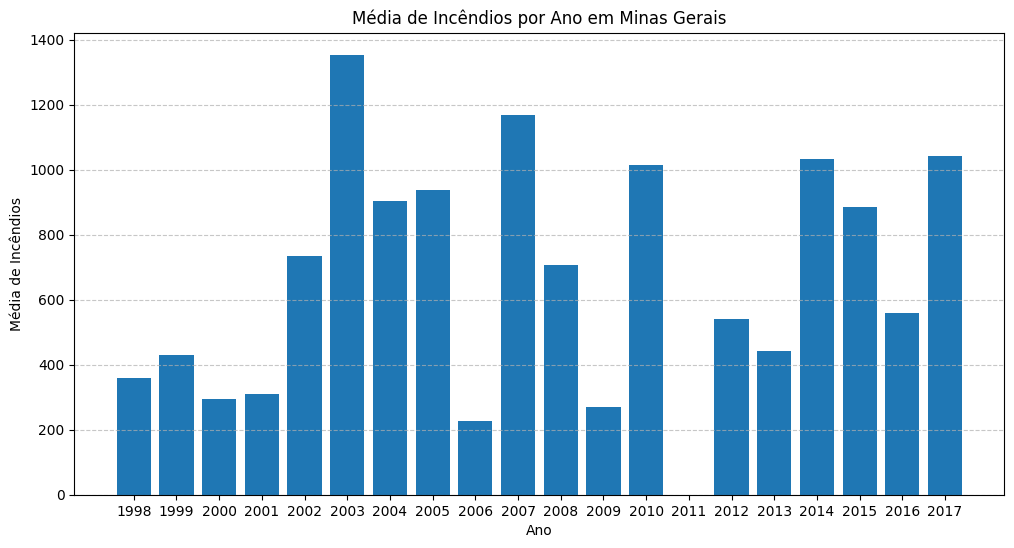

In [11]:
# Filtrar os dados para o estado "Minas Gerais"
minas_gerais_data = fire[fire['state'] == 'Minas Gerais']

# Agrupar os dados por ano e calcular a média dos números de incêndios
annual_mean_incidents = minas_gerais_data.groupby('year')['number'].mean()

# Criar um gráfico de barras para mostrar a média de incêndios por ano
plt.figure(figsize=(12, 6))
plt.bar(annual_mean_incidents.index, annual_mean_incidents.values)
plt.title("Média de Incêndios por Ano em Minas Gerais")
plt.xlabel("Ano")
plt.ylabel("Média de Incêndios")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Definir o intervalo dos anos a serem exibidos no eixo X
plt.xticks(annual_mean_incidents.index)

plt.show()



In [12]:
# Filtrar os dados para o ano de 2011
data_2011 = fire[fire['year'] == 2011]

# Agrupar os dados por estado e calcular a soma dos números de incêndios
incidents_by_state_2011 = data_2011.groupby('state')['number'].sum()

# Exibir o número de incêndios por estado em 2011
print(incidents_by_state_2011)

state
Acre                 1912.0
Alagoas               232.0
Amapa                1100.0
Amazonas             4188.0
Bahia               13061.0
Ceara                3773.0
Distrito Federal      273.0
Espirito Santo        326.0
Goias                5638.0
Maranhao            14955.0
Mato Grosso         17771.0
Minas Gerais            0.0
Para                17687.0
Paraiba              3280.0
Pernambuco           1589.0
Piau                10515.0
Rio                  2370.0
Rondonia             4504.0
Roraima               833.0
Santa Catarina        902.0
Sao Paulo            3520.0
Sergipe               137.0
Tocantins           10387.0
Name: number, dtype: float64


      year month           state   number
0     1998   Apr            Acre      0.0
1     1998   Apr         Alagoas      0.0
2     1998   Apr           Amapa      0.0
3     1998   Apr        Amazonas      0.0
4     1998   Apr           Bahia      0.0
...    ...   ...             ...      ...
5378  2017   Sep         Roraima     43.0
5379  2017   Sep  Santa Catarina    626.0
5380  2017   Sep       Sao Paulo   2868.0
5381  2017   Sep         Sergipe      0.0
5382  2017   Sep       Tocantins  10737.0

[5383 rows x 4 columns]
state  year month    Acre  Alagoas  Amapa  Amazonas   Bahia  Ceara  \
0      1998   Apr     0.0      0.0    0.0       0.0     0.0    0.0   
1      1998   Aug   130.0      1.0    1.0     321.0   815.0   93.0   
2      1998   Dez     7.0     32.0   84.0     196.0    82.0  276.0   
3      1998   Feb     0.0      0.0    0.0       0.0     0.0    0.0   
4      1998   Jan     0.0      0.0    0.0       0.0     0.0    0.0   
..      ...   ...     ...      ...    ...       ...

<ipython-input-13-72748b9d1bce>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = pivoted.corr()


year     2010    2011  variation_rate
month                                
Apr     105.0    71.0       -0.323810
Aug    2914.0  1613.0       -0.446465
Dez       0.0     0.0        0.000000
Feb      86.0    45.0       -0.476744
Jan      59.0    39.0       -0.338983
Jul     941.0   607.0       -0.354942
Jun     278.0   314.0        0.129496
Mar      65.0    19.0       -0.707692
May     239.0   136.0       -0.430962
Nov      67.0    59.0       -0.119403
Oct    1227.0   476.0       -0.612062
Sep    5075.0  2259.0       -0.554877
      year country         state month  number
833   2010  Brazil  Minas Gerais   May   179.0
958   2010  Brazil  Minas Gerais   Apr   112.0
996   2010  Brazil  Minas Gerais   Aug  3353.0
1001  2010  Brazil  Minas Gerais   Feb   155.0
1272  2010  Brazil  Minas Gerais   Jul   707.0
1304  2010  Brazil  Minas Gerais   Dez   105.0
3092  2010  Brazil  Minas Gerais   Jan   118.0
3645  2010  Brazil  Minas Gerais   Oct  2048.0
5019  2010  Brazil  Minas Gerais   Sep  5059.

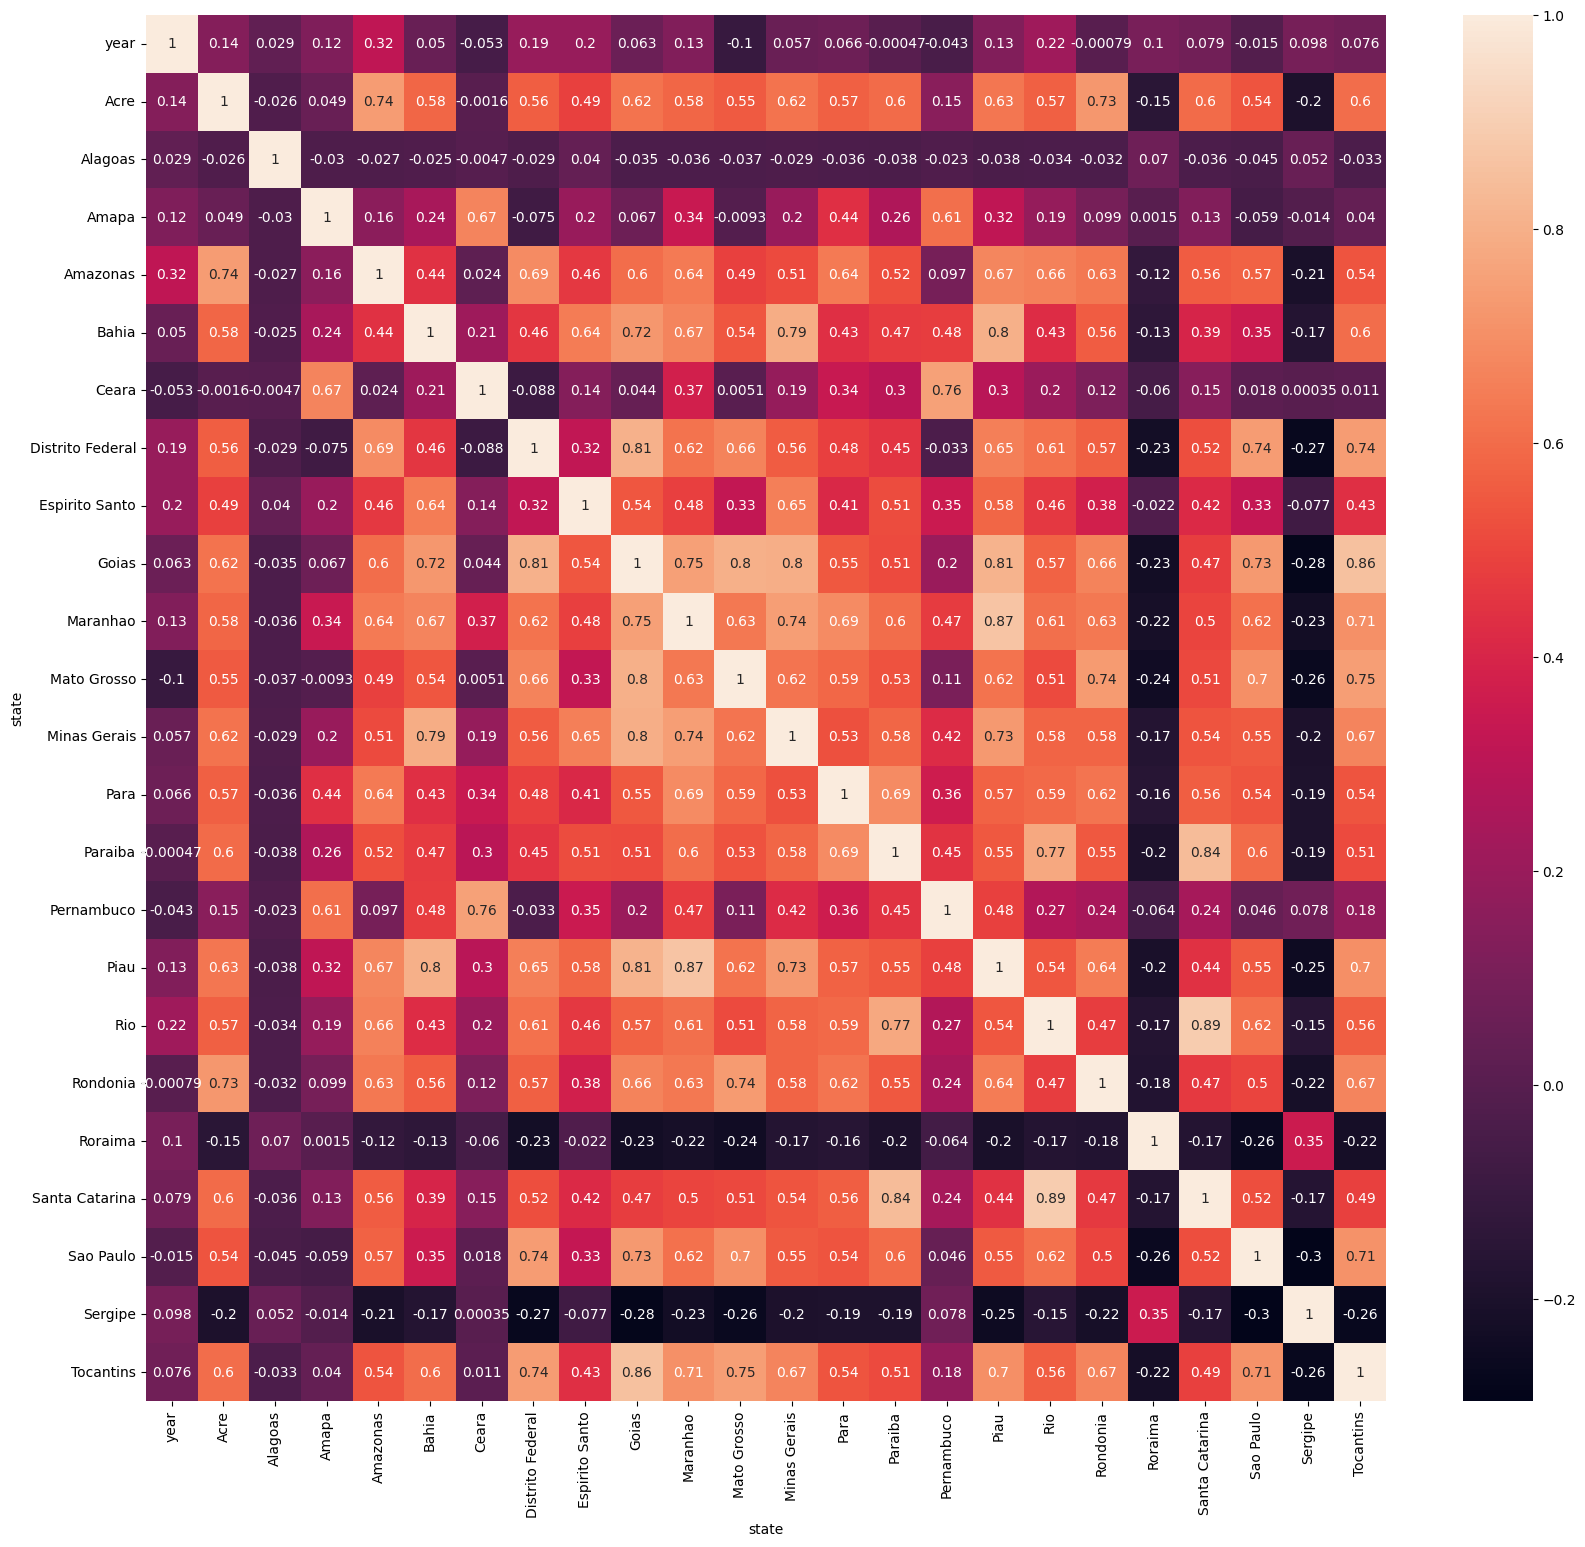

In [13]:
# Groups the original DataFrame "fire" by 'year', 'month', and 'state', calculates the sum of 'number' for each group, and then displays the resulting aggregated DataFrame.
fire_corr = fire.groupby(['year', 'month', 'state'])['number'].sum().reset_index()
print (fire_corr)
# Take the aggregated data from fire_corr, pivots it into a new DataFrame with 'year' and 'month' as regular columns, 'state' as column headers, and the sums of 'number' in each cell
pivoted = fire_corr.pivot_table(values='number', index=['year', 'month'], columns='state', aggfunc='sum').reset_index()
print (pivoted)
# In order to fill in the missing values for the state of 'Minas Gerais' in 2011, we will determine which state has the highest correlation.
correlation_matrix = pivoted.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(data=correlation_matrix, annot=True)
# As we can see, the state of 'Goias' has the highest correlation. Therefore, we will use this state to determine the rate of change for each month and apply the same growth to the values of the state of 'Minas Gerais' from 2010 to 2011."
# Calculate the rate of change for the state of Bahia between 2010 and 2011 and store the values in a new dataframe.
fire_goias = fire[(fire['state'] == 'Goias') & ((fire['year'] == 2010) | (fire['year'] == 2011))]
pivot_table = pd.pivot_table(fire_goias, values='number', index='month', columns='year', aggfunc='sum')
variation_rate = pivot_table.pct_change(axis=1).fillna(0)
pivot_table['variation_rate'] = variation_rate[2011]
print (pivot_table)
pivot_table = pivot_table.reset_index()
# Filter the DataFrame "fire" to select rows where the 'state' is "Minas Gerais" and the 'year' is 2010. It then extracts the 'month' column values from these filtered rows and retrieves the first value.
fire_minasgerais_2010 = fire[(fire['state'] == 'Minas Gerais') & (fire['year'] == 2010)]
print (fire_minasgerais_2010)
# For loop to iterate through the rows of the 'fire' DataFrame and replace the value of the 'number' feature for each month of the year 2011 in the state of 'Minas Gerais' with the value of the same month in 2010, multiplied by 1 plus the previously calculated growth rate.
for index, row in fire.iterrows():
    if row['year'] == 2011 and row['state'] == 'Minas Gerais':
        #Find the corresponding month in the 'fire_minasgerais_2010' DataFrame.
        month = row['month']
        # calculates and rounds the value for the state of Minas Gerais in a specific month of 2011 by applying a growth factor based on the variation rate calculated from the state of Goias in the same month. The result is assigned to the variable value_2010.
        value_2010 = round(fire_minasgerais_2010[(fire_minasgerais_2010['year'] == 2010) & (fire_minasgerais_2010['month'] == month)]['number'].values[0] * (1 + pivot_table[(pivot_table['month'] == month)]['variation_rate'].values[0]))
        # Update the value of the 'number' column in 'fire' with the value of 'value_2010'.
        fire.at[index, 'number'] = value_2010
# Print values from the 'fire' dataframe to validate if they are filled in accordance with the assumed assumptions
filtered_rows_teste = fire[(fire['state'] == 'Minas Gerais') & (fire['year'] == 2011)]
print (filtered_rows_teste)

**4.   Outliers**

The team analyzed per year, state and month, individually, if there were outliers.



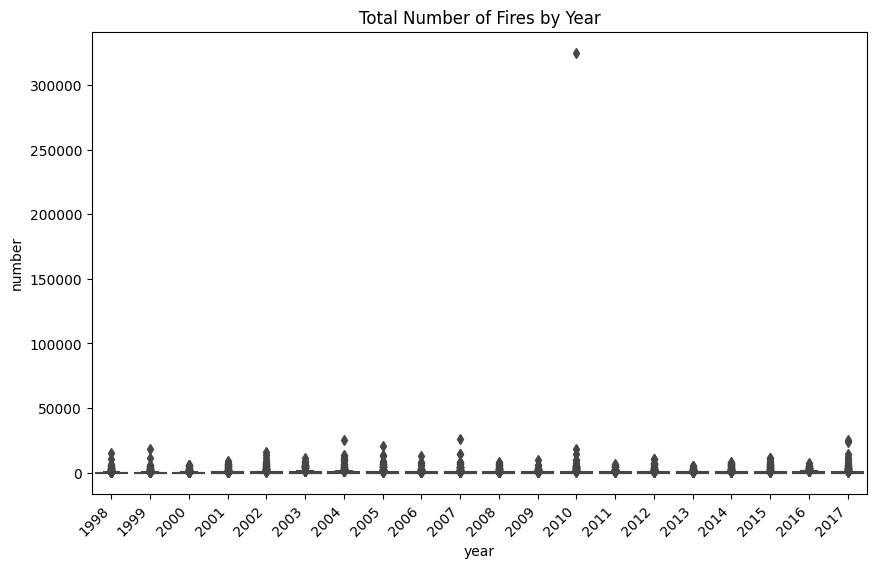

In [14]:
# Create a box plot for the year with rotated X-axis labels
plt.figure(figsize=(10, 6))
sns.boxplot(data=fire, x='year', y='number')
plt.title('Total Number of Fires by Year')
# Rotate the X-axis labels for better readability
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

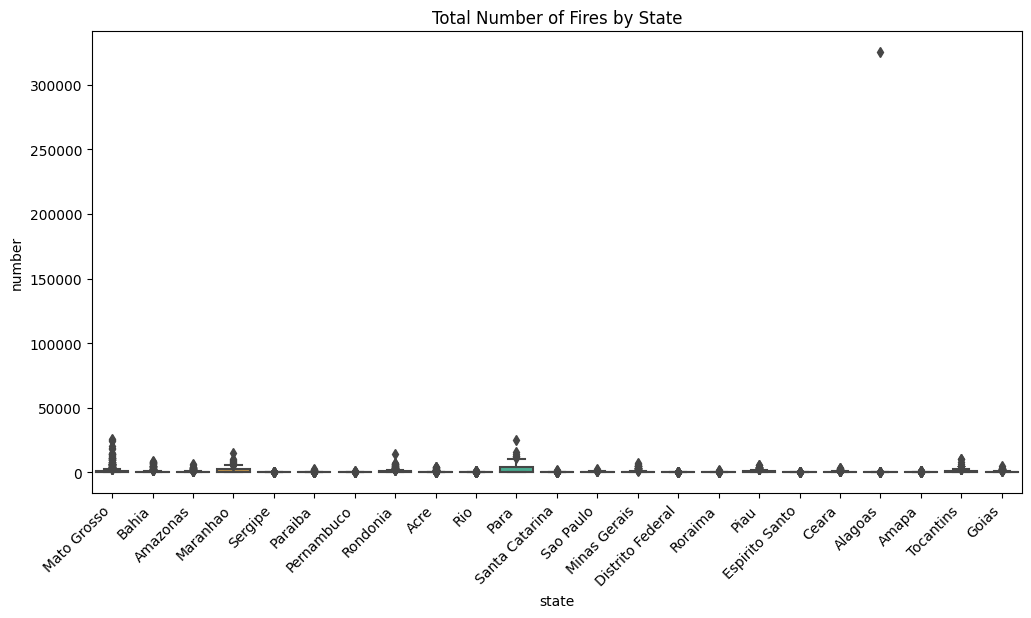

In [15]:
# Create a box plot for each state
plt.figure(figsize=(12, 6))
sns.boxplot(data=fire, x='state', y='number')
plt.title('Total Number of Fires by State')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

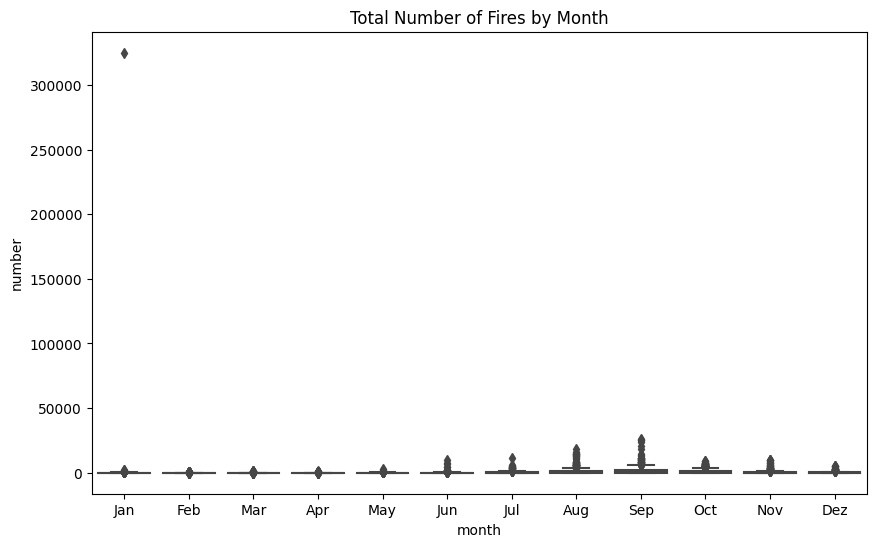

In [16]:
# Create a box plot for each month
order_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dez']
plt.figure(figsize=(10, 6))
sns.boxplot(data=fire, x='month', y='number', order=order_months)
plt.title('Total Number of Fires by Month')
plt.show()

Some graphs suggested data below zero. The team confirmed that there were not negative values.

In [17]:
###  Making sure there is no entry with a negative value
number_column = fire['number']
# Calculate the minimum and maximum values
min_value = number_column.min()
max_value = number_column.max()
# Print the minimum and maximum values
print("Minimum value of 'number' feature:", min_value)
print("Maximum value of 'number' feature:", max_value)

Minimum value of 'number' feature: 0.0
Maximum value of 'number' feature: 325000.0


Through the boxplot it was verified that there was one extreme outlier, for the state Alagoas in January of 2010.
Which was confirmed here:

(We used a threshold of 6 for Z-scores to exclude unreal values, but at the same time to maintain extreme wildfire events, considering their potential significance in the analysis.)


In [18]:
#fire['number'].fillna(0, inplace=True)  # Replace NaN values with 0 or another appropriate value
# Calculate the Z-scores for the 'number' column
z_scores = np.abs(stats.zscore(fire['number']))
# Define a threshold for Z-scores
threshold = 6
# Identify the rows with outliers by checking if the Z-scores exceed the threshold
outliers = fire[np.abs(z_scores) > threshold]
# Print the rows with outliers
for index, row in outliers.iterrows():
    print("Outlier Row:")
    print(row)
    print("")

Outlier Row:
year           2010
country      Brazil
state       Alagoas
month           Jan
number     325000.0
Name: 5322, dtype: object



The identified outlier was substituted by the mean of all january of the state Alagoas.

In [19]:
# Identify the outlier row
outlier_index = fire[(fire['number'] == 325000.0) & (fire['state'] == 'Alagoas') & (fire['month'] == 'Jan')].index
# Exclude the outlier from the calculation
filtered_data = fire[(fire['state'] == 'Alagoas') & (fire['month'] == 'Jan') & (fire.index != outlier_index[0])]
# Calculate the average of 'number' for January in Alagoas
average_number = filtered_data['number'].mean()
# Replace the outlier value with the calculated average
fire.at[outlier_index[0], 'number'] = average_number

In [20]:
# Filter the data for the state 'Alagoas' and the month 'Jan'
alagoas_jan = fire[( fire['state'] == 'Alagoas') & ( fire['month'] == 'Jan')]
# Group the filtered data by 'year' and calculate the sum of 'number' per year
sum_per_year = alagoas_jan.groupby('year')['number'].sum()
# Print the result in the desired format
for year, total in sum_per_year.items():
    print(f"{year}: {total}")

1998: 0.0
1999: 58.0
2000: 11.0
2001: 5.0
2002: 12.0
2003: 150.0
2004: 9.0
2005: 83.0
2006: 29.0
2007: 33.0
2008: 55.0
2009: 104.0
2010: 45.5
2011: 41.0
2012: 36.0
2013: 49.0
2014: 54.0
2015: 81.0
2016: 24.0
2017: 76.0


**5.   Duplicated rows**

Next, the team analyzed duplicated rows and deleted them.

In [21]:
# Encontre as linhas duplicadas
duplicated_rows = fire.duplicated(keep='first')

# Filtrar as linhas duplicadas
duplicated_data = fire[duplicated_rows]

# Ordenar as linhas duplicadas por year, state e month
duplicated_data = duplicated_data.sort_values(by=['year', 'state', 'month'])

# Exiba as linhas duplicadas ordenadas
print(duplicated_data)

      year country        state month  number
1300  1998  Brazil  Mato Grosso   Apr     0.0
1246  1998  Brazil  Mato Grosso   Feb     0.0
3412  1998  Brazil  Mato Grosso   Jan     0.0
5408  1998  Brazil  Mato Grosso   Mar     0.0
2207  1998  Brazil  Mato Grosso   May     0.0
3530  1998  Brazil      Paraiba   Apr     0.0
4033  1998  Brazil      Paraiba   Feb     0.0
3825  1998  Brazil      Paraiba   Jan     0.0
4126  1998  Brazil      Paraiba   Mar     0.0
5878  1998  Brazil      Paraiba   May     0.0
2358  1998  Brazil          Rio   Apr     0.0
3985  1998  Brazil          Rio   Apr     0.0
3446  1998  Brazil          Rio   Feb     0.0
4389  1998  Brazil          Rio   Feb     0.0
4285  1998  Brazil          Rio   Jan     0.0
4779  1998  Brazil          Rio   Jan     0.0
3758  1998  Brazil          Rio   Mar     0.0
5333  1998  Brazil          Rio   Mar     0.0
2723  1998  Brazil          Rio   May     0.0
3843  1998  Brazil          Rio   May     0.0
6124  2001  Brazil          Rio   

In [22]:
fire = fire.drop_duplicates(keep='first')

In [23]:
num_observations = fire.shape[0]
num_features = fire.shape[1]
print(f"The dataset has {num_observations} observations (rows) and {num_features} features (columns).")

The dataset has 6270 observations (rows) and 5 features (columns).


**6.   Multiple number of entries per year/state/month**

The team decided to confirm if for the same year/state/month, the dataset only had one record.



In [24]:
# Crie um DataFrame com os registros duplicados com base em 'year', 'state' e 'month'
duplicates = fire[fire.duplicated(subset=['year', 'state', 'month'], keep=False)]

# Se houver duplicatas, exiba as linhas com valores diferentes para 'number'
if not duplicates.empty:
    # Use groupby para agrupar por 'year', 'state' e 'month' e calcule o número de valores únicos em 'number'
    unique_values = duplicates.groupby(['year', 'state', 'month'])['number'].nunique()

    # Se algum valor em 'unique_values' for maior que 1, significa que há números diferentes para o mesmo 'year', 'state' e 'month'
    if (unique_values > 1).any():
        print("Existem registos com números diferentes para o mesmo 'year', 'state' e 'month'.")
    else:
        print("Não existem registos com números diferentes para o mesmo 'year', 'state' e 'month'.")
else:
    print("Não existem registos duplicados para o mesmo 'year', 'state' e 'month.")


Existem registos com números diferentes para o mesmo 'year', 'state' e 'month'.


Since, the dataset presented multiple records for the same year/state/month, investigations were performed:

In [25]:
# Encontre os registros duplicados com base em 'year', 'state' e 'month'
duplicates = fire[fire.duplicated(subset=['year', 'state', 'month'], keep=False)]

# Use groupby para agrupar por 'year', 'state' e 'month' e calcule o número de valores únicos em 'number'
unique_values = duplicates.groupby(['year', 'state', 'month'])['number'].nunique()

# Se algum valor em 'unique_values' for maior que 1, significa que há números diferentes para o mesmo 'year', 'state' e 'month
has_different_numbers = unique_values > 1

# Se houver registros com números diferentes, exiba esses registros ordenados por 'year', 'state' e 'month'
if has_different_numbers.any():
    # Filtre os registros que têm números diferentes
    different_number_records = duplicates[duplicates.set_index(['year', 'state', 'month']).index.isin(unique_values[has_different_numbers].index)]

    # Ordene os registros por 'year', 'state' e 'month'
    sorted_records = different_number_records.sort_values(by=['year', 'state', 'month'])

    # Exiba os registros ordenados
    print(sorted_records)
else:
    print("Não existem registos com números diferentes para o mesmo 'year', 'state' e 'month'.")

      year country        state month   number
4038  1998  Brazil  Mato Grosso   Aug  15406.0
6087  1998  Brazil  Mato Grosso   Aug    228.0
5645  1998  Brazil  Mato Grosso   Dez    100.0
6110  1998  Brazil  Mato Grosso   Dez     76.0
1739  1998  Brazil  Mato Grosso   Jul   3712.0
...    ...     ...          ...   ...      ...
5148  2017  Brazil          Rio   Oct    238.0
5177  2017  Brazil          Rio   Oct    101.0
3981  2017  Brazil          Rio   Sep     48.0
4641  2017  Brazil          Rio   Sep    728.0
5224  2017  Brazil          Rio   Sep    343.0

[1569 rows x 5 columns]


It was decided to sum up the different numbers for the same year/state/month:

In [26]:
# Agrupa o DataFrame por estado, ano e mês e calcule o somatório do número de incêndios
fire = fire.groupby(['state', 'year', 'month']).agg({'number': 'sum'}).reset_index()
# Exiba o novo DataFrame
print(fire)

          state  year month   number
0          Acre  1998   Apr      0.0
1          Acre  1998   Aug    130.0
2          Acre  1998   Dez      7.0
3          Acre  1998   Feb      0.0
4          Acre  1998   Jan      0.0
...         ...   ...   ...      ...
5378  Tocantins  2017   Mar     98.0
5379  Tocantins  2017   May    576.0
5380  Tocantins  2017   Nov    434.0
5381  Tocantins  2017   Oct   2969.0
5382  Tocantins  2017   Sep  10737.0

[5383 rows x 4 columns]


To validate the previous code, it was decided to count the rows per each set of year/state/month.
Here, it was observed some missing rows, so further investigations were needed.

In [27]:
# Get the unique states in the 'fire' DataFrame
unique_states = fire['state'].unique()
# Create a separate table for each state
for state in unique_states:
    # Filter the data for the current state
    state_data = fire[fire['state'] == state]
    # Group the data by 'year' and 'month' and count the number of records
    record_count_per_month_per_year = (state_data.groupby(['year', 'month']).size().unstack())
    # Check if 'Dez' (December) is in the unique months for the current state
    if 'Dez' not in record_count_per_month_per_year.columns:
        record_count_per_month_per_year['Dez'] = 0  # Set a default value of 0 for December
    # Reorder the columns to ensure the months are in the correct order
    months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dez']
    record_count_per_month_per_year = record_count_per_month_per_year[months_order]
    # Display the resulting table for the current state
    print(f"State: {state}")
    print(record_count_per_month_per_year)
    print("\n")

State: Acre
month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dez
year                                                             
1998   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
1999   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2000   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2001   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2002   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2003   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2004   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2005   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2006   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2007   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2008   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2009   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2010   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.

**7. Missing records and Inappropriated zero values**

It was decided to check the number of fires in each row:


In [28]:
# Get the unique states in the DataFrame
unique_states = fire['state'].unique()
# Create a separate table for each state
for state in unique_states:
    # Filter the data for the current state
    state_data = fire[fire['state'] == state]
    # Group the data by 'year', 'month', and calculate the sum of 'number'
    sum_per_month_per_year = (state_data.groupby(['year', 'month'])
                             ['number'].sum().unstack())
    # Check if 'Dez' (December) is in the unique months for the current state
    if 'Dez' not in sum_per_month_per_year.columns:
        sum_per_month_per_year['Dez'] = 0  # Set a default value of 0 for December
    # Reorder the columns to ensure the months are in the correct order
    months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dez']
    sum_per_month_per_year = sum_per_month_per_year[months_order]
    # Display the resulting table for the current state
    print(f"State: {state}")
    print(sum_per_month_per_year)
    print("\n")

State: Acre
month   Jan  Feb   Mar   Apr   May   Jun    Jul     Aug     Sep     Oct  \
year                                                                      
1998    0.0  0.0   0.0   0.0   0.0   3.0   37.0   130.0   509.0    44.0   
1999    0.0  0.0   0.0   0.0   0.0   0.0    1.0    63.0   209.0    60.0   
2000    0.0  0.0  11.0   1.0   1.0   1.0    1.0   136.0   265.0    18.0   
2001    0.0  0.0   0.0   0.0   0.0   1.0    3.0   396.0   290.0   137.0   
2002    0.0  1.0   0.0   0.0   0.0   0.0   39.0   728.0  1949.0   687.0   
2003   10.0  0.0   0.0   1.0   6.0   0.0  168.0  1976.0  3942.0   740.0   
2004    0.0  3.0   0.0   2.0   7.0   5.0   42.0   645.0  1978.0   461.0   
2005   12.0  0.0   3.0   1.0   2.0  27.0  368.0  4198.0  4253.0   547.0   
2006    4.0  0.0   0.0   0.0   8.0   1.0   33.0   839.0   237.0   316.0   
2007    0.0  5.0   2.0   0.0   1.0   4.0   29.0   960.0   208.0   203.0   
2008    0.0  0.0   0.0   0.0   0.0   0.0   41.0   445.0  1666.0   652.0   
2009    0.0  

Different situations were observed:
*   the historic only starts on june 1998 (incl.), in all states;

*   Goias did not have fires in every december (number =0);

*   some states do not present values on december (no records);

*   December of 2017 do not present data, in any state (NaN);

*   "Inappropriated" zero values;

Specifically:
*   the historic only starts on june 1998 (incl.), in all states:
    *   the data from 1998 only represents ~3% of the dataset, so it will be deleted;

In [29]:
#Delete the year 1998
fire = fire[fire['year'] != 1998]

#Validate the minimum of the column year
min_year = fire['year'].min()
print("O ano mínimo é:", min_year)


O ano mínimo é: 1999


*   Goias did not have fires in every december (number =0):
    *   mean of the November and January;

In [30]:
# Goias did not have fires in every december (number =0): mean of the November and January;
# List of years (excluding 2017)
years_to_process = list(range(1998, 2017))

# Filter the data for Goias in December
goias_december = fire[(fire['state'] == 'Goias') & (fire['month'] == 'Dez')]

for year in years_to_process:
    # Check if the year exists in the dataset
    if year in fire['year'].unique():
        # Calculate the average between November of the current year and January of the next year
        current_november = fire[(fire['state'] == 'Goias') & (fire['year'] == year) & (fire['month'] == 'Nov')]['number'].mean()
        next_january = fire[(fire['state'] == 'Goias') & (fire['year'] == year + 1) & (fire['month'] == 'Jan')]['number'].mean()
        average_value = (current_november + next_january) / 2

        # Update the 'number' value in the DataFrame for December in the current year
        fire.loc[(fire['state'] == 'Goias') & (fire['year'] == year) & (fire['month'] == 'Dez'), 'number'] = average_value


# Filtrar o DataFrame para Goiás no mês de dezembro
goias_december = fire[(fire['state'] == 'Goias') & (fire['month'] == 'Dez')]

# Exibir os valores de dezembro em Goiás
print(goias_december)


      state  year month  number
1926  Goias  1999   Dez    60.0
1938  Goias  2000   Dez    27.5
1950  Goias  2001   Dez    13.5
1962  Goias  2002   Dez   103.0
1974  Goias  2003   Dez    89.0
1986  Goias  2004   Dez   159.0
1998  Goias  2005   Dez   114.5
2010  Goias  2006   Dez    59.5
2022  Goias  2007   Dez    51.0
2034  Goias  2008   Dez    60.0
2046  Goias  2009   Dez    74.0
2058  Goias  2010   Dez    53.0
2070  Goias  2011   Dez    40.0
2082  Goias  2012   Dez    45.0
2094  Goias  2013   Dez   131.5
2106  Goias  2014   Dez   149.5
2118  Goias  2015   Dez   299.5
2130  Goias  2016   Dez    88.0



*   some states do not present values on december (no records):
    * mean of the November and January;      


In [31]:
# States that do not present values on December (no records): mean of November and January
# List of states with missing December records
states_with_missing_december = ["Sergipe", "Sao Paulo", "Santa Catarina", "Roraima", "Rondonia", "Rio"]
# Define the range of years (1999 to 2016)
years_range = range(1999, 2017)
# Iterate through states and years
for state in states_with_missing_december:
    for year in years_range:
        # Check if December ('Dez') is missing for the current state and year
        if fire[(fire['state'] == state) & (fire['year'] == year) & (fire['month'] == 'Dez')].empty:
            # Calculate the average between November ('Nov' of the current year) and January ('Jan' of the next year)
            november_value = fire[(fire['state'] == state) & (fire['year'] == year) & (fire['month'] == 'Nov')]['number'].mean()
            january_value = fire[(fire['state'] == state) & (fire['year'] == year + 1) & (fire['month'] == 'Jan')]['number'].mean()
            # Calculate the average
            average_value = (november_value + january_value) / 2
            # Insert the average value into the DataFrame for the state, year, and month 'Dez'
            fire = fire.append({'year': year, 'state': state, 'month': 'Dez', 'number': round(average_value)}, ignore_index=True)

# Now, the DataFrame 'fire' contains the missing December values with the calculated averages as integers, without 'country' and 'date'.

<ipython-input-31-e05cf4a2092b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fire = fire.append({'year': year, 'state': state, 'month': 'Dez', 'number': round(average_value)}, ignore_index=True)
<ipython-input-31-e05cf4a2092b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fire = fire.append({'year': year, 'state': state, 'month': 'Dez', 'number': round(average_value)}, ignore_index=True)
<ipython-input-31-e05cf4a2092b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fire = fire.append({'year': year, 'state': state, 'month': 'Dez', 'number': round(average_value)}, ignore_index=True)
<ipython-input-31-e05cf4a2092b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

In [32]:
new_december_values = []
# Define the range of years (1999 to 2016)
years_range = range(1999, 2017)
for state in states_with_missing_december:
    state_values = []
    for year in years_range:
        # Find the calculated value for December in the DataFrame
        value = fire[(fire['state'] == state) & (fire['year'] == year) & (fire['month'] == 'Dez')]['number'].values[0]
        state_values.append(value)
    new_december_values.append(state_values)
# Create a new DataFrame with the calculated values
new_december_df = pd.DataFrame(new_december_values, index=states_with_missing_december, columns=years_range)
# Display the resulting table
print(new_december_df)

                 1999  2000   2001   2002   2003   2004   2005   2006   2007  \
Sergipe           2.0   1.0    3.0  128.0    9.0   60.0   30.0   30.0   54.0   
Sao Paulo       217.0  61.0   94.0   66.0   96.0   85.0  120.0   28.0   42.0   
Santa Catarina   49.0  15.0   44.0  196.0  192.0  162.0  212.0   27.0   26.0   
Roraima          16.0  66.0  189.0  340.0  191.0  120.0  102.0  110.0  178.0   
Rondonia         20.0   6.0   48.0  350.0  278.0  276.0  240.0  143.0   28.0   
Rio             154.0  22.0  182.0  238.0  304.0  342.0  320.0  138.0  128.0   

                 2008   2009   2010   2011   2012   2013   2014    2015   2016  
Sergipe          38.0   19.0   26.0   22.0   20.0   14.0   26.0    28.0   24.0  
Sao Paulo        16.0   64.0   90.0   62.0   43.0  110.0   88.0    53.0   34.0  
Santa Catarina   18.0   32.0   48.0   46.0   45.0   71.0   36.0    31.0  101.0  
Roraima          42.0  332.0  126.0  169.0  292.0  230.0  236.0  1017.0   90.0  
Rondonia         48.0   73.0  120.

In [33]:
# Validation
# Get the unique states in the DataFrame
unique_states = fire['state'].unique()
# Create a separate table for each state
for state in unique_states:
    # Filter the data for the current state
    state_data = fire[fire['state'] == state]
    # Group the data by 'year', 'month', and calculate the sum of 'number'
    sum_per_month_per_year = (state_data.groupby(['year', 'month'])
                             ['number'].sum().unstack())
    # Check if 'Dez' (December) is in the unique months for the current state
    if 'Dez' not in sum_per_month_per_year.columns:
        sum_per_month_per_year['Dez'] = 0  # Set a default value of 0 for December
    # Reorder the columns to ensure the months are in the correct order
    months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dez']
    sum_per_month_per_year = sum_per_month_per_year[months_order]
    # Display the resulting table for the current state
    print(f"State: {state}")
    print(sum_per_month_per_year)
    print("\n")

State: Acre
month   Jan  Feb   Mar   Apr   May   Jun    Jul     Aug     Sep     Oct  \
year                                                                      
1999    0.0  0.0   0.0   0.0   0.0   0.0    1.0    63.0   209.0    60.0   
2000    0.0  0.0  11.0   1.0   1.0   1.0    1.0   136.0   265.0    18.0   
2001    0.0  0.0   0.0   0.0   0.0   1.0    3.0   396.0   290.0   137.0   
2002    0.0  1.0   0.0   0.0   0.0   0.0   39.0   728.0  1949.0   687.0   
2003   10.0  0.0   0.0   1.0   6.0   0.0  168.0  1976.0  3942.0   740.0   
2004    0.0  3.0   0.0   2.0   7.0   5.0   42.0   645.0  1978.0   461.0   
2005   12.0  0.0   3.0   1.0   2.0  27.0  368.0  4198.0  4253.0   547.0   
2006    4.0  0.0   0.0   0.0   8.0   1.0   33.0   839.0   237.0   316.0   
2007    0.0  5.0   2.0   0.0   1.0   4.0   29.0   960.0   208.0   203.0   
2008    0.0  0.0   0.0   0.0   0.0   0.0   41.0   445.0  1666.0   652.0   
2009    0.0  2.0   1.0   0.0   3.0   0.0   31.0   194.0  1265.0   565.0   
2010    1.0  

*   December of 2017 do not present data, in any state (NaN):
    * calculate the variation, for each month, between 2016 and 2017; do the mean of the variation and consider that variation when calculating Dec 2017 (=Dec 2016 * mean variation);


In [34]:
# December of 2017 do not present data, in any state (NaN): calculate the variation, for each month, between 2016 and 2017; do the mean of the variation and consider that variation when calculating Dec 2017 (=Dec 2016 * mean variation);
# Filtrar os dados de dezembro de 2016
fire_2016 = fire[(fire['year'] == 2016)]

# Filtrar os dados de dezembro de 2017
fire_2017 = fire[(fire['year'] == 2017)]

# Lista de meses, excluindo Dezembro
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']

# Criar um dicionário para armazenar as diferenças percentuais por estado
state_percent_changes = {}

# Iterar pelos estados únicos no DataFrame
unique_states = fire['state'].unique()

for state in unique_states:
    # Filtrar os dados apenas para o estado atual em 2016
    state_fire_2016 = fire_2016[fire_2016['state'] == state]

    # Filtrar os dados apenas para o estado atual em 2017
    state_fire_2017 = fire_2017[fire_2017['state'] == state]

    # Calcular as diferenças percentuais para cada mês
    percent_changes = {}
    for month in months:
        if month in state_fire_2016['month'].values and month in state_fire_2017['month'].values:
            prev_y = state_fire_2016[state_fire_2016['month'] == month]['number'].values[0]
            current_y = state_fire_2017[state_fire_2017['month'] == month]['number'].values[0]

            # Verificar se o valor anterior é zero ou próximo de zero (evitar divisão por zero)
            if prev_y <= 0.001:
                percent_change = np.inf  # Usar infinito para indicar crescimento infinito
            else:
                percent_change = ((current_y - prev_y) / prev_y) * 100
            percent_changes[month] = percent_change

    # Armazenar as diferenças percentuais no dicionário
    state_percent_changes[state] = percent_changes

# Calcular a média das diferenças percentuais por estado
state_average_percent_changes = {}

for state, percent_changes in state_percent_changes.items():
    # Exclua valores infinitos (inf) antes de calcular a média
    valid_percent_changes = [percent for percent in percent_changes.values() if not np.isinf(percent)]
    if valid_percent_changes:
        average_percent_change = sum(valid_percent_changes) / len(valid_percent_changes)
        state_average_percent_changes[state] = average_percent_change

# Iterar pelos estados únicos
for state in unique_states:
    # Calcular o valor corrigido para dezembro em cada estado
    if state in state_average_percent_changes:
        average_percent_change = state_average_percent_changes[state]
        original_value = fire[(fire['year'] == 2016) & (fire['month'] == 'Dez') & (fire['state'] == state)]['number'].values
        print(original_value)
        if len(original_value) > 0:
            original_value = original_value[0]
            corrected_value = round(original_value * (1 + average_percent_change / 100))
            print(corrected_value)
            # Criar um registro para dezembro de 2017 no DataFrame corrigido
            new_row = {
                'year': 2017,
                #'country': 'Brazil',
                'state': state,
                'month': 'Dez',
                'number': corrected_value
            }

            # Adicione o novo registro ao DataFrame corrigido
            fire = fire.append(new_row, ignore_index=True)

# Salvar o DataFrame corrigido no arquivo CSV
fire.to_csv('/content/drive/MyDrive/Colab Notebooks/fire_dez2017_corrigido.csv', index=False)

[6.]
6
[155.]
107
[491.]
393
[133.]
128
[164.]
143
[819.]
1093
[0.]
0
[12.]
4
[88.]
116
[1577.]
1675
[548.]
930
[91.]
116
[33.]
54
[53.]
77
[161.]
173
[374.]
341
[130.]
127
[222.]
147
[90.]
134
[101.]
115
[34.]
43
[24.]
13
[119.]
117


<ipython-input-34-8a21817a4c09>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fire = fire.append(new_row, ignore_index=True)
<ipython-input-34-8a21817a4c09>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fire = fire.append(new_row, ignore_index=True)
<ipython-input-34-8a21817a4c09>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fire = fire.append(new_row, ignore_index=True)
<ipython-input-34-8a21817a4c09>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fire = fire.append(new_row, ignore_index=True)
<ipython-input-34-8a21817a4c09>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

In [35]:
# Validation
# Get the unique states in the DataFrame
unique_states = fire['state'].unique()
# Create a separate table for each state
for state in unique_states:
    # Filter the data for the current state
    state_data = fire[fire['state'] == state]
    # Group the data by 'year', 'month', and calculate the sum of 'number'
    sum_per_month_per_year = (state_data.groupby(['year', 'month'])
                             ['number'].sum().unstack())
    # Check if 'Dez' (December) is in the unique months for the current state
    if 'Dez' not in sum_per_month_per_year.columns:
        sum_per_month_per_year['Dez'] = 0  # Set a default value of 0 for December
    # Reorder the columns to ensure the months are in the correct order
    months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dez']
    sum_per_month_per_year = sum_per_month_per_year[months_order]
    # Display the resulting table for the current state
    print(f"State: {state}")
    print(sum_per_month_per_year)
    print("\n")

State: Acre
month   Jan  Feb   Mar   Apr   May   Jun    Jul     Aug     Sep     Oct  \
year                                                                      
1999    0.0  0.0   0.0   0.0   0.0   0.0    1.0    63.0   209.0    60.0   
2000    0.0  0.0  11.0   1.0   1.0   1.0    1.0   136.0   265.0    18.0   
2001    0.0  0.0   0.0   0.0   0.0   1.0    3.0   396.0   290.0   137.0   
2002    0.0  1.0   0.0   0.0   0.0   0.0   39.0   728.0  1949.0   687.0   
2003   10.0  0.0   0.0   1.0   6.0   0.0  168.0  1976.0  3942.0   740.0   
2004    0.0  3.0   0.0   2.0   7.0   5.0   42.0   645.0  1978.0   461.0   
2005   12.0  0.0   3.0   1.0   2.0  27.0  368.0  4198.0  4253.0   547.0   
2006    4.0  0.0   0.0   0.0   8.0   1.0   33.0   839.0   237.0   316.0   
2007    0.0  5.0   2.0   0.0   1.0   4.0   29.0   960.0   208.0   203.0   
2008    0.0  0.0   0.0   0.0   0.0   0.0   41.0   445.0  1666.0   652.0   
2009    0.0  2.0   1.0   0.0   3.0   0.0   31.0   194.0  1265.0   565.0   
2010    1.0  

**Questions:**

1. *To check the minimun and maximum of "year" column.*

During the data cleaning, the team decided to delete the year 1998, as explained before. So, the minimum is currently 1999 and the maximum is 2017.


In [36]:
min_year = fire['year'].min()
print("O ano mínimo é:", min_year)

max_year = fire['year'].max()
print("O ano máximo é:", max_year)

O ano mínimo é: 1999
O ano máximo é: 2017


2. *To find out the total number of fires in "Acre" state and visualizing data based on each "year".*

Total Number of Fires in Acre State: 67621. And 2005 revealed to be the year with the higher number of fires, so far.


Total Number of Fires in Acre State: 67621.0


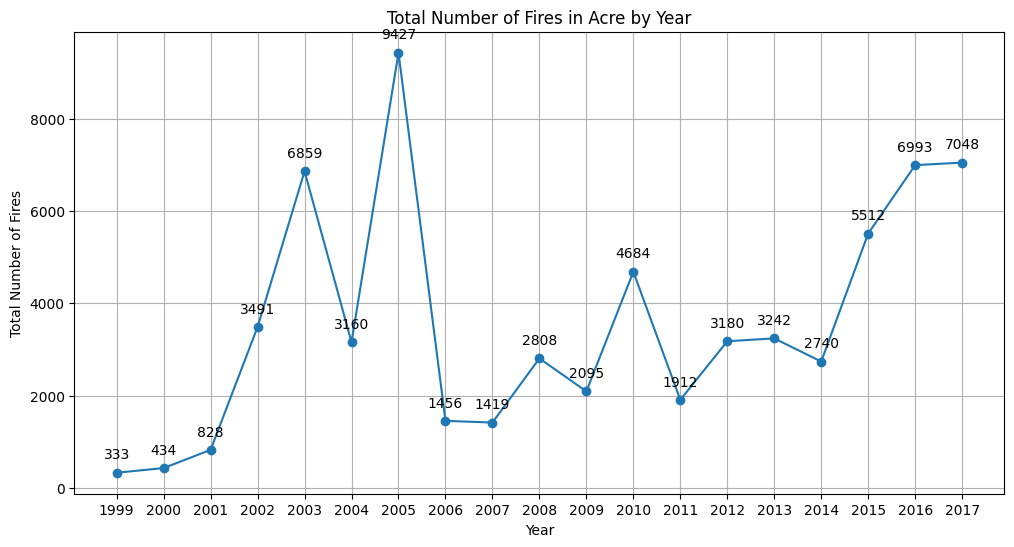

In [37]:
# Filter the dataset for the "Acre" state
acre = fire[fire['state'] == 'Acre']

# Calculate the total number of fires in the "Acre" state
total_fires_in_acre = acre['number'].sum()
print("Total Number of Fires in Acre State:", total_fires_in_acre)

fires_by_year = acre.groupby('year')['number'].sum().reset_index()

# Create a list of all unique years from the dataset
all_years = sorted(fires_by_year['year'].unique())

plt.figure(figsize=(12, 6))
plt.plot(fires_by_year['year'], fires_by_year['number'], marker='o')
plt.xticks(all_years)  # Set the x-axis labels to be all unique years
plt.title('Total Number of Fires in Acre by Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Fires')
plt.grid(True)

# Annotate data points with the 'number' value as integers
for i, row in fires_by_year.iterrows():
    plt.annotate(f'{int(row["number"])}', (row['year'], row['number']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()


3. *To find out total number of fires by state.*

Mato Grosso is the state with a higher number of fires.

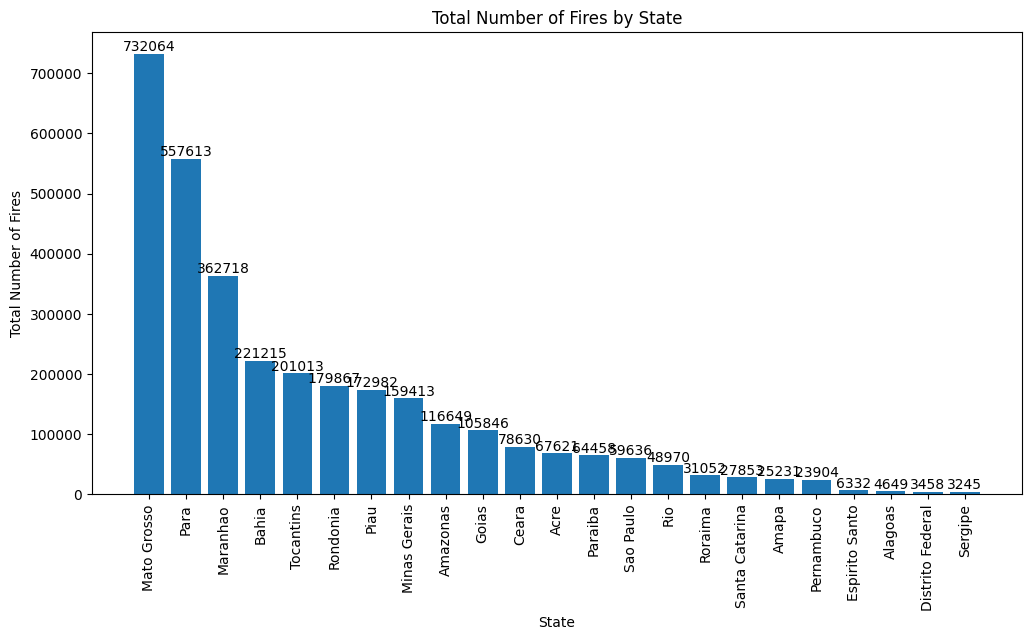

In [38]:
total_fires_by_state = fire.groupby('state')['number'].sum().reset_index()
total_fires_by_state = total_fires_by_state.sort_values(by='number', ascending=False)

plt.figure(figsize=(12, 6))
bar_plot = plt.bar(total_fires_by_state['state'], total_fires_by_state['number'])
plt.title('Total Number of Fires by State')
plt.xlabel('State')
plt.ylabel('Total Number of Fires')
plt.xticks(rotation=90)

# Annotate data points with the 'number' value vertically above each bar
for bar, number in zip(bar_plot, total_fires_by_state['number']):
    plt.text(bar.get_x() + bar.get_width() / 2, number, int(number), ha='center', va='bottom')

plt.show()

4. *To find out the total number of fires in 2010 and visualizing data based on each "month".*

September is the month with a higher number of fires, in 2010.

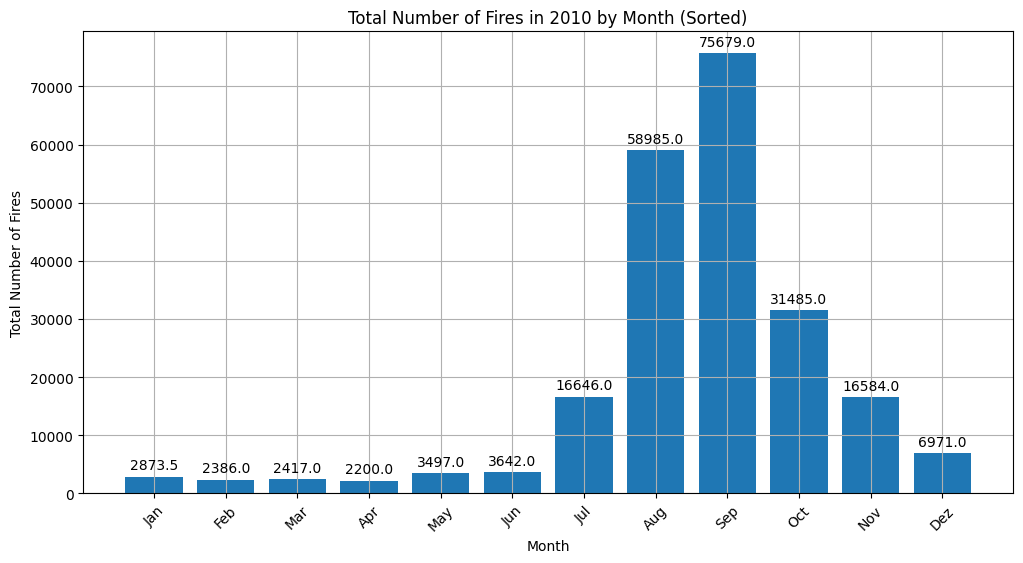

In [39]:
# Filter the dataset for the year 2010
fires_2010 = fire[fire['year'] == 2010]

# Define a custom order for months in chronological order
custom_month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dez']

# Group the data by month and calculate the sum of 'number'
fires_by_month_2010 = fires_2010.groupby('month')['number'].sum().reindex(custom_month_order)

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(fires_by_month_2010.index, fires_by_month_2010.values)
plt.title('Total Number of Fires in 2010 by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Total Number of Fires')
plt.xticks(rotation=45)
plt.grid(True)

# Annotate data points with the 'number' value at the top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom')

plt.show()


5. *To find out average number of total fires.*

  5.1. *Only Jan*

Average Number of Total Fires: 621

Average Number of Total Fires in January: 120

In [40]:
average_number_of_fires = fire['number'].mean()
print(f"Average Number of Total Fires: {round(average_number_of_fires)}")

# Filter the dataset for the month of January
january_fires = fire[fire['month'] == 'Jan']
# Calculate the average number of total fires for January
average_number_of_fires_jan = january_fires['number'].mean()
print(f"Average Number of Total Fires in January: {round(average_number_of_fires_jan)}")

Average Number of Total Fires: 621
Average Number of Total Fires in January: 120


6. *To find out the state names where fires occurred in "Dec" month.*

At this point, all states present data in december, due to data cleaning made by the team. Check section "7. Missing records and Inappropriated zero values".
(NOTE: the dataset considers "Dez")

In [41]:
# Get the distinct values in the 'month' column
distinct_months = fire['month'].unique()

# Print the distinct months
print("Distinct Months:", distinct_months)

Distinct Months: ['Apr' 'Aug' 'Dez' 'Feb' 'Jan' 'Jul' 'Jun' 'Mar' 'May' 'Nov' 'Oct' 'Sep']


In [42]:
december_states = fire[fire['month'] == 'Dez']['state'].unique()
print("States with Fires in December:")
print(december_states)

States with Fires in December:
['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Para'
 'Paraiba' 'Pernambuco' 'Piau' 'Tocantins' 'Sergipe' 'Sao Paulo'
 'Santa Catarina' 'Roraima' 'Rondonia' 'Rio']


7. *From an EDA perspective what analysis would you add?*

The team thought that it was relevant to analyze if there were specific peaks in certain months and if there was an increase over the years, for each state.

In fact, it was observed that between september and march is a very critical season in Brazil. Plus, some states also presented a smaller peak around june.
Interestingly, when investigating by state, it was clear that each state had its own pattern, in a month and year level, which might be explained by the region (north, south).
For instance, Acre has fires predominantly in September, while Alagoas has in December.
Also, Amazonas has been increasingly burning over the years, while the other states are more or less constant over the years.

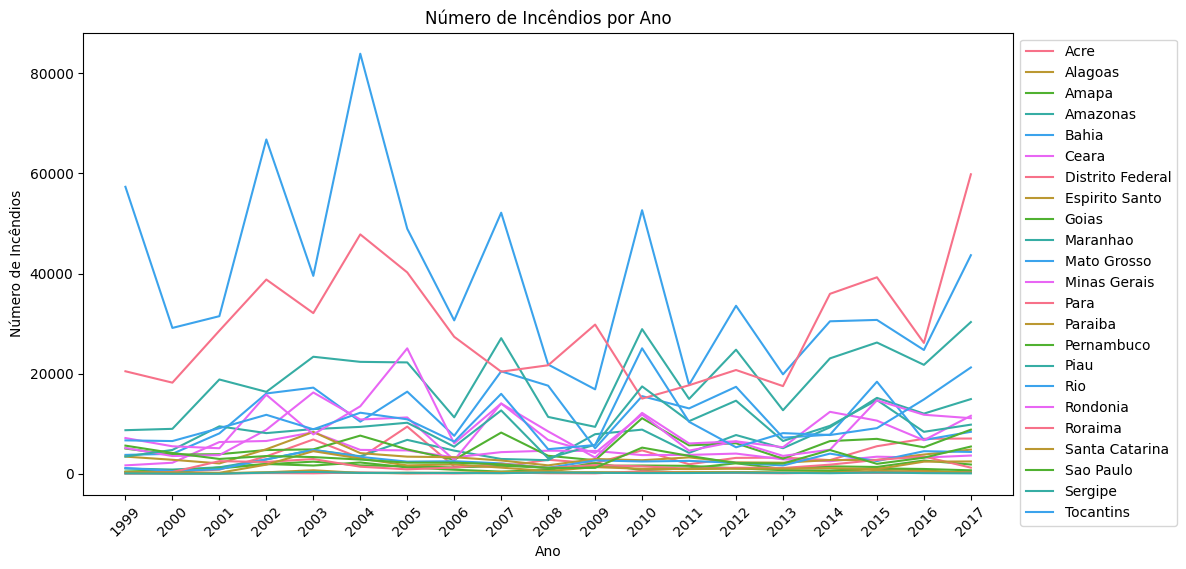

In [43]:
# By year:
# Configure a paleta de cores (opcional)
sns.set_palette("husl")
# Obtenha a lista de todos os estados únicos no DataFrame
unique_states = fire['state'].unique()
# Crie um gráfico de linhas para cada estado
plt.figure(figsize=(12, 6))
for state in unique_states:
    state_data = fire[fire['state'] == state]
    total_fires_per_year = state_data.groupby('year')['number'].sum()
    plt.plot(total_fires_per_year.index, total_fires_per_year.values, label=state)
plt.title('Número de Incêndios por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Incêndios')
plt.xticks(total_fires_per_year.index, rotation=45)  # Rótulos de ano no eixo X
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


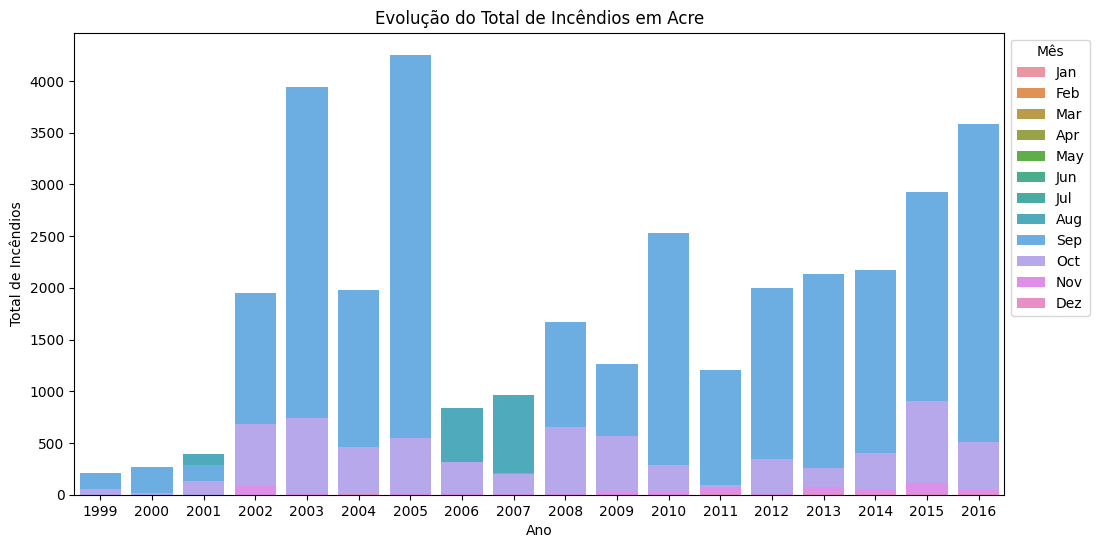

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


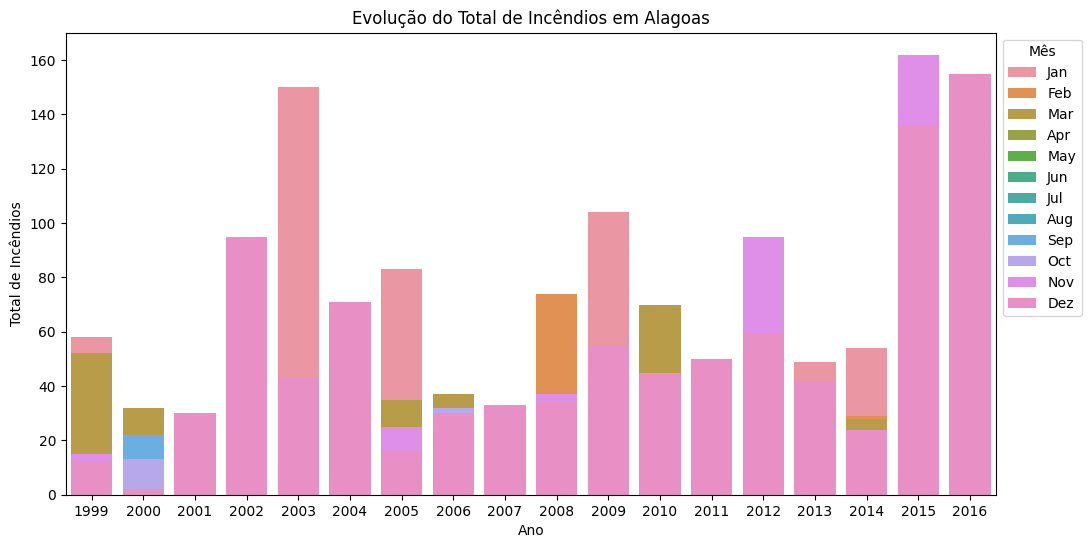

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


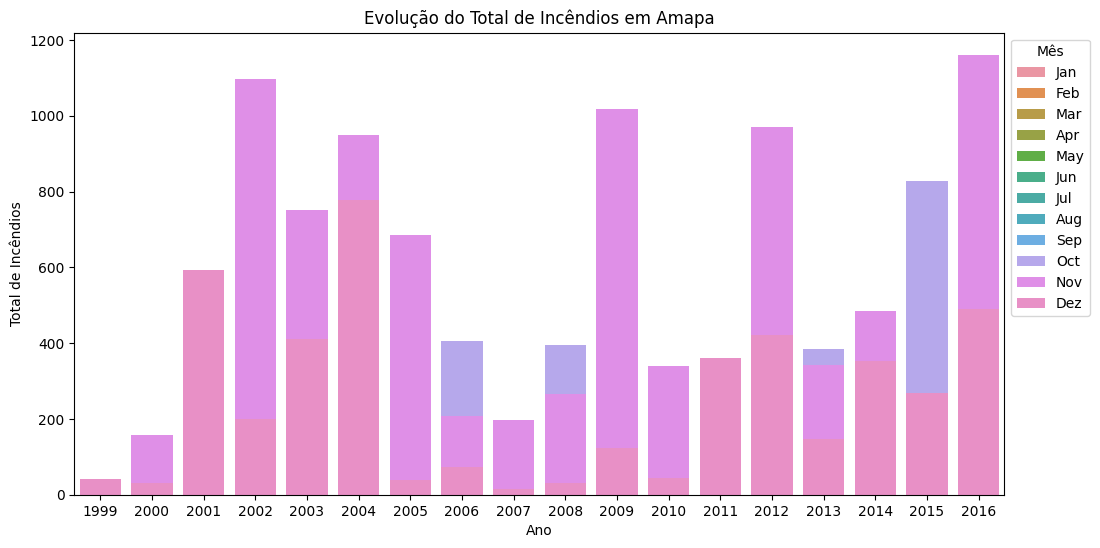

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


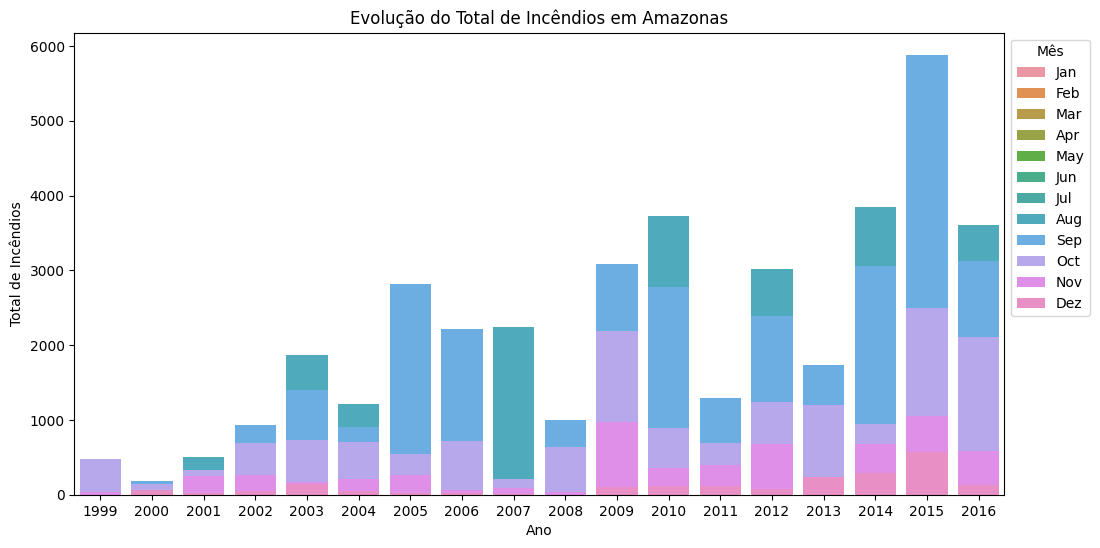

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


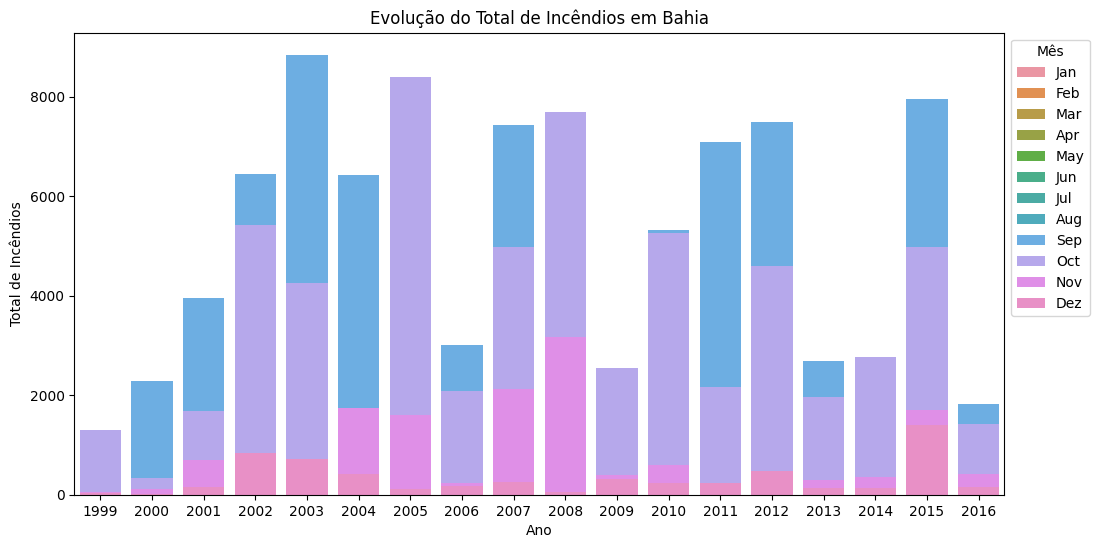

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


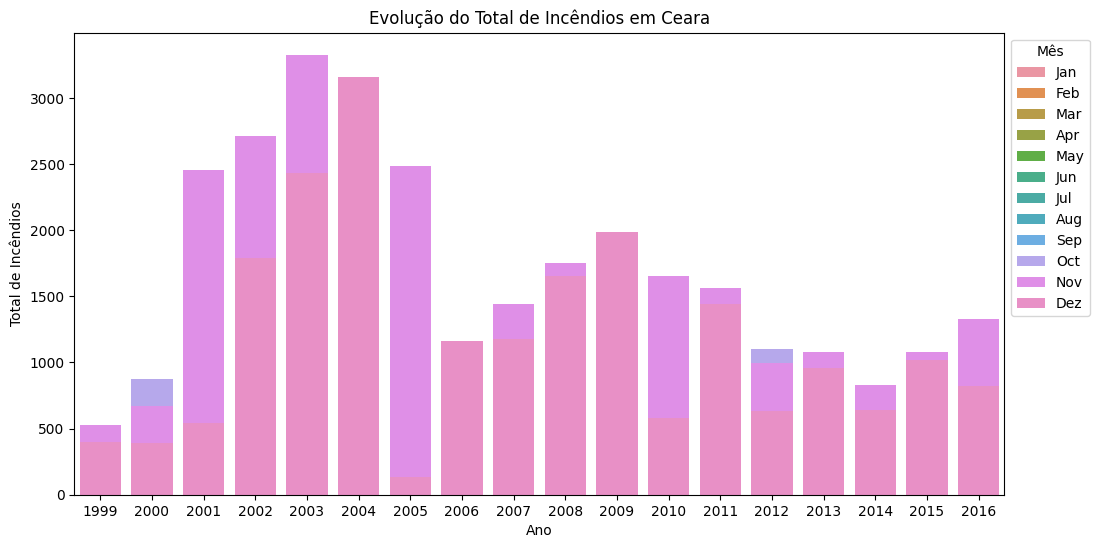

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


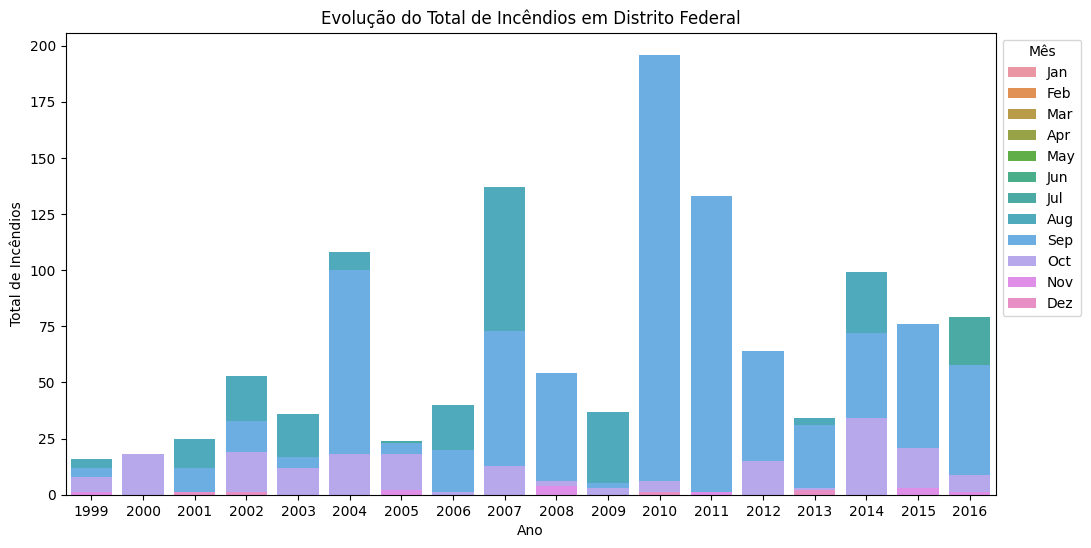

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


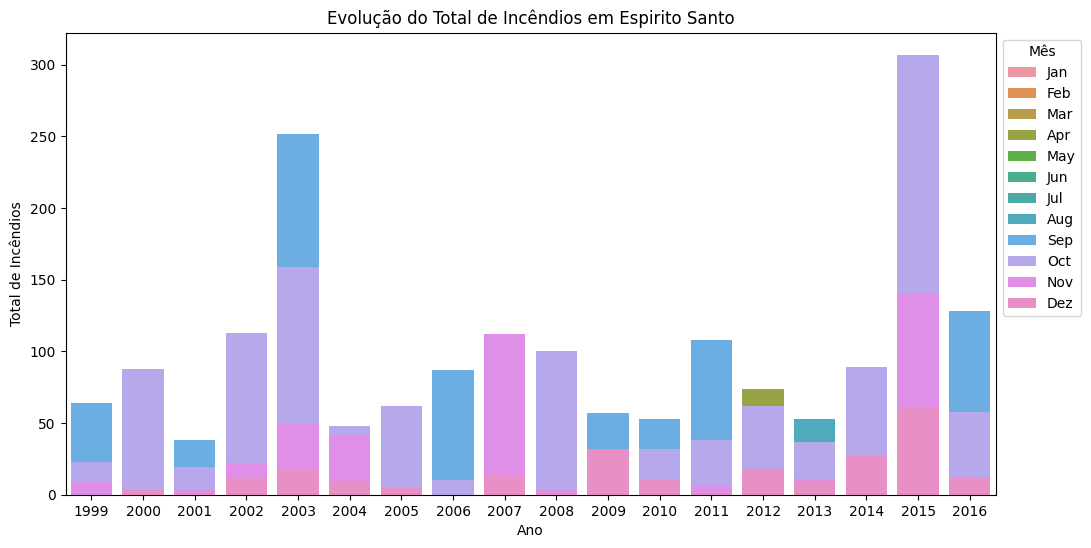

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


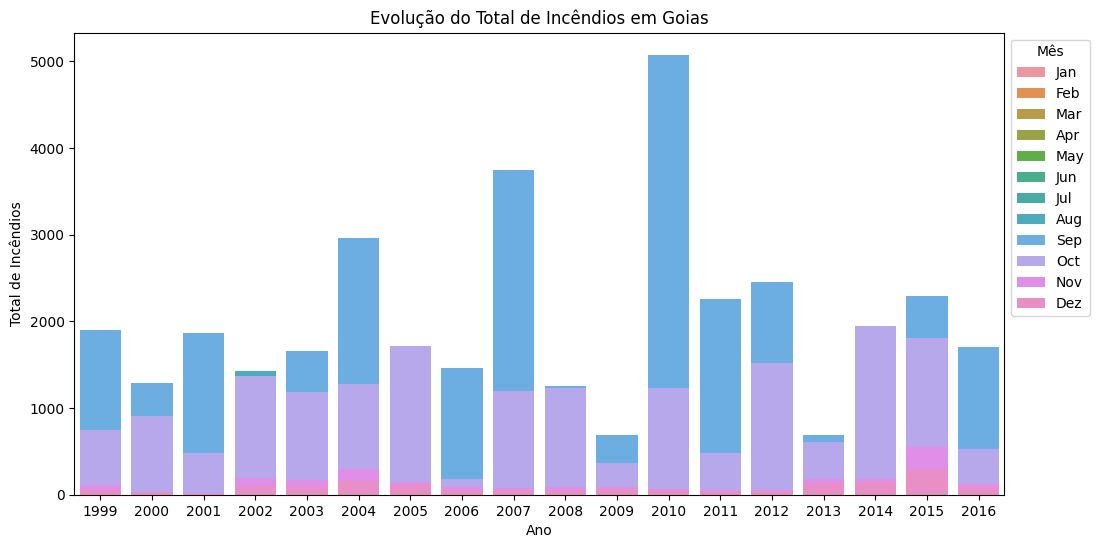

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


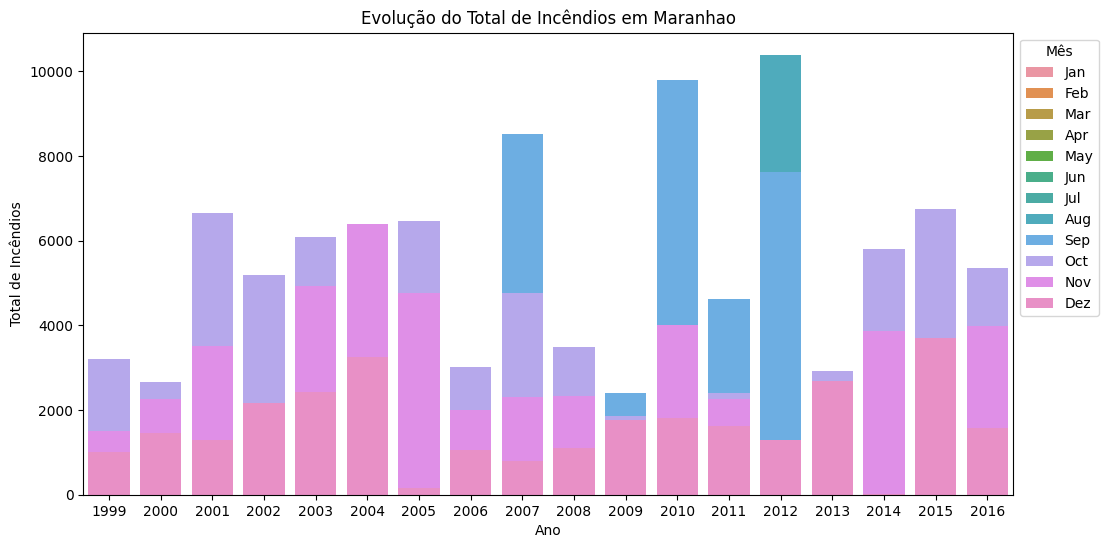

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


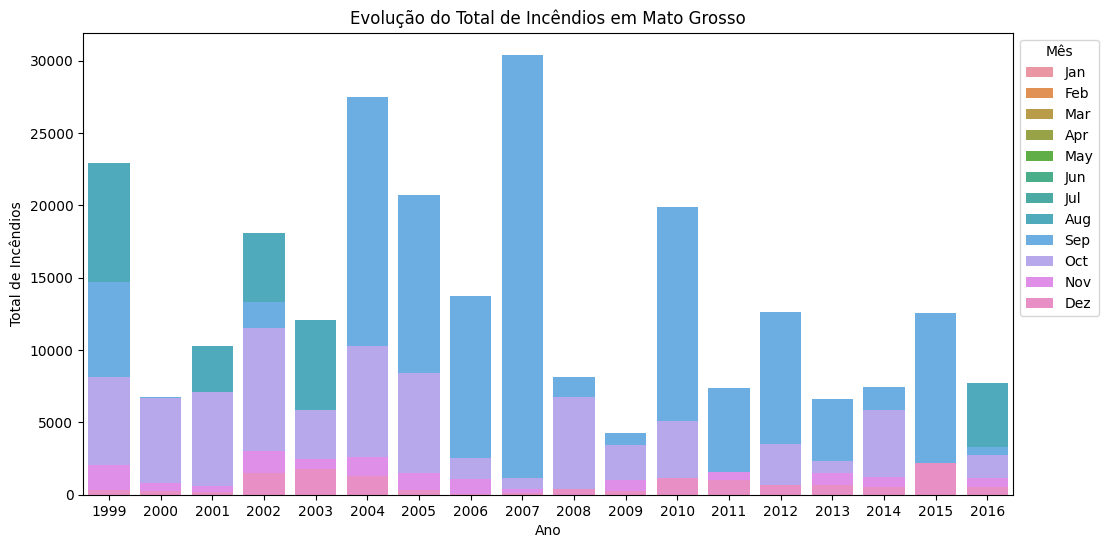

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


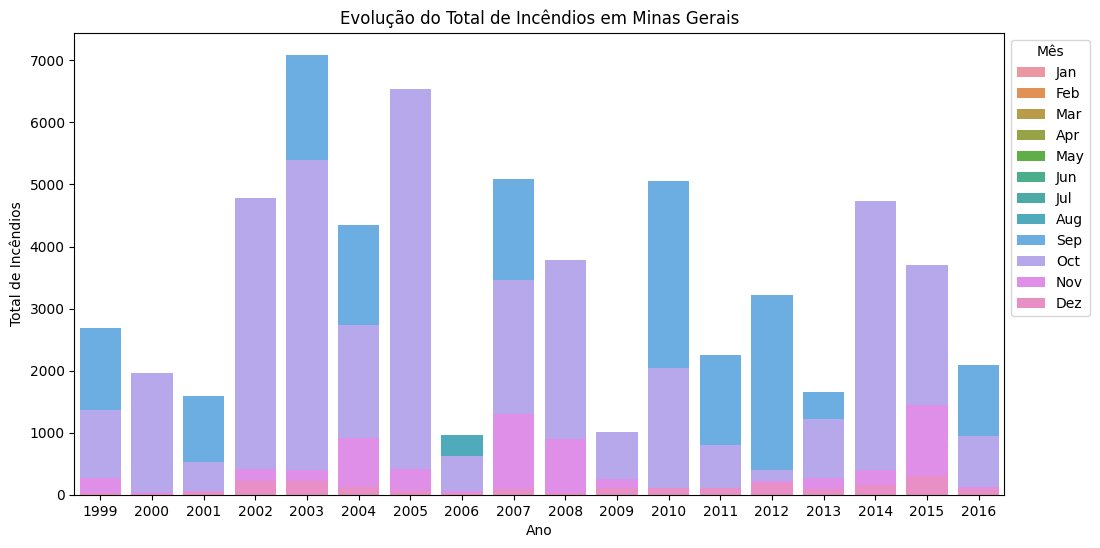

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


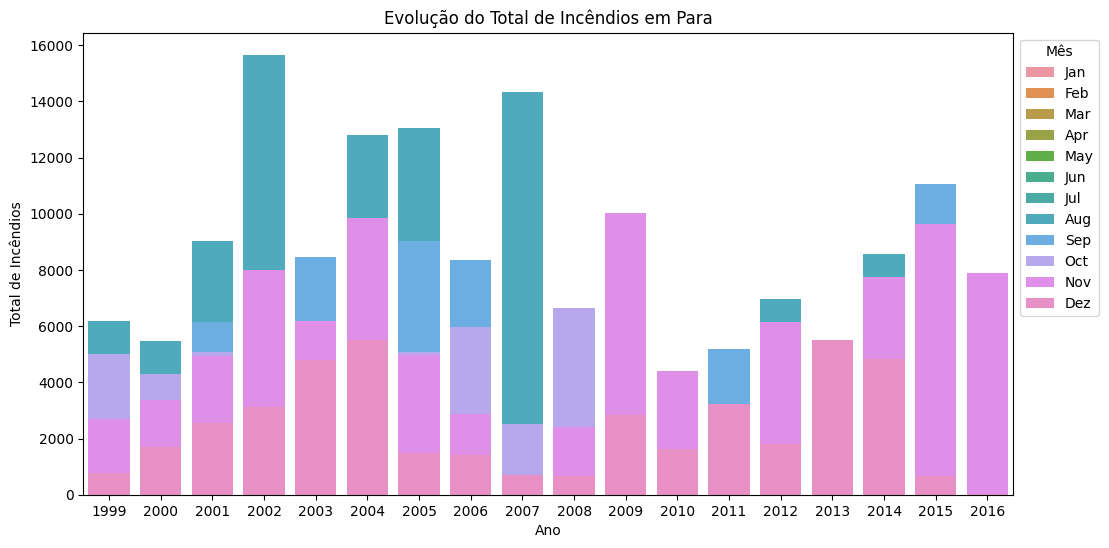

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


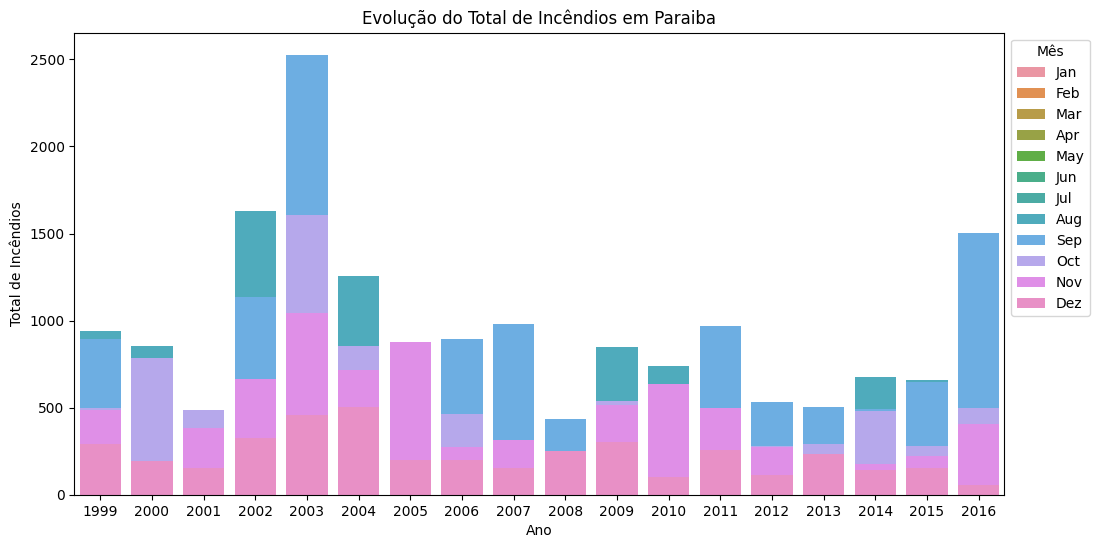

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


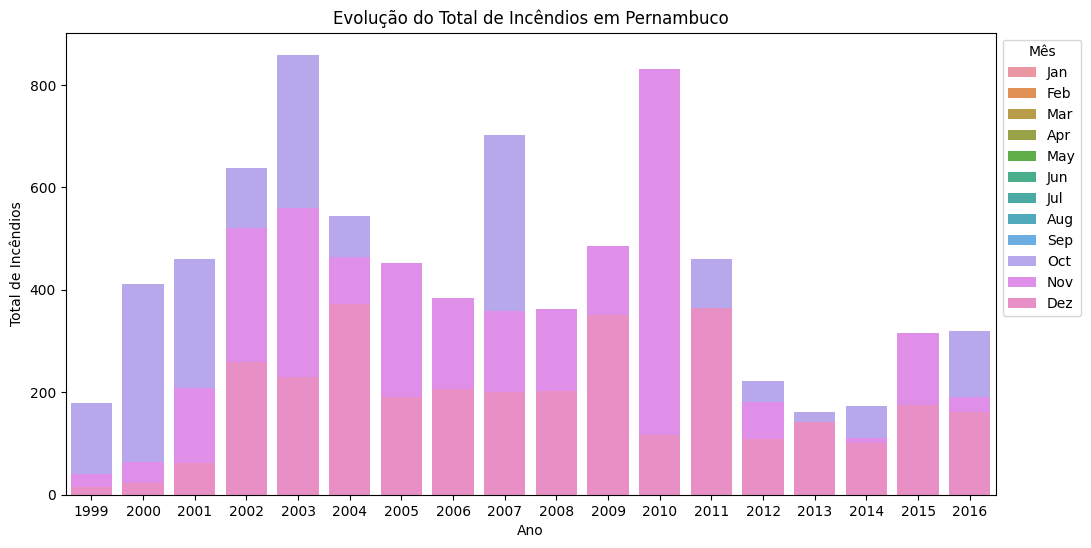

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


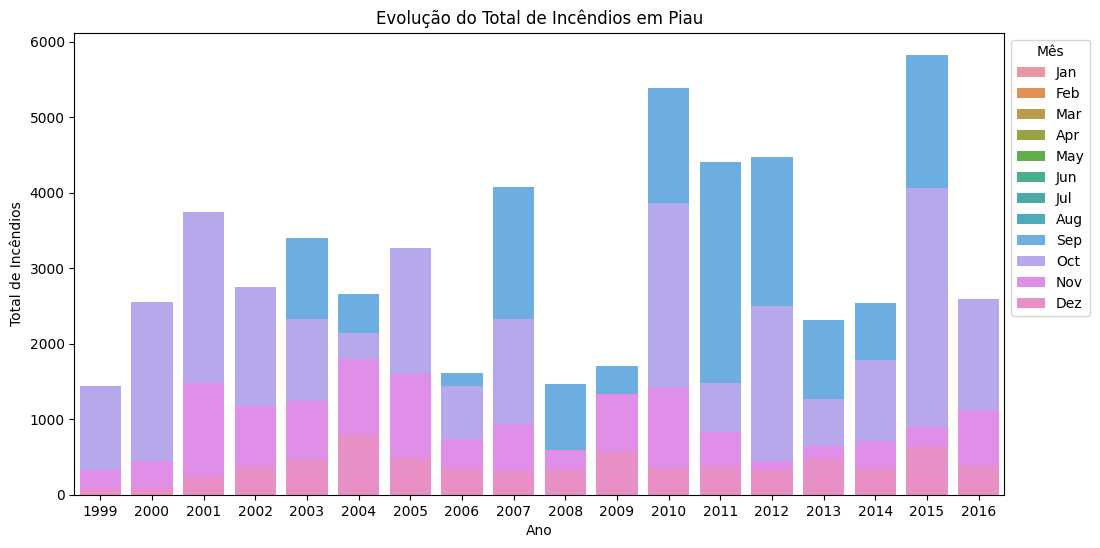

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


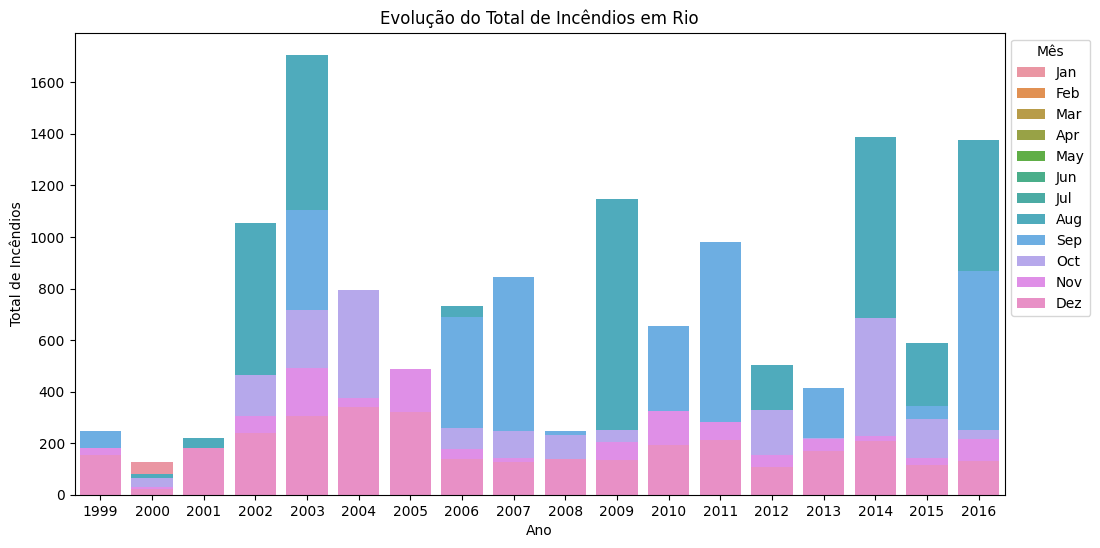

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


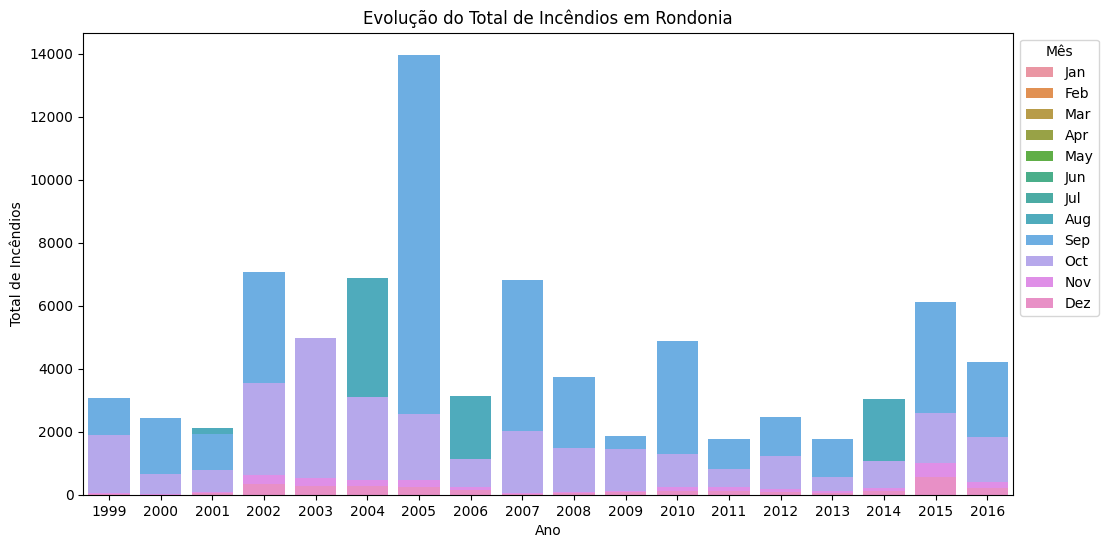

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


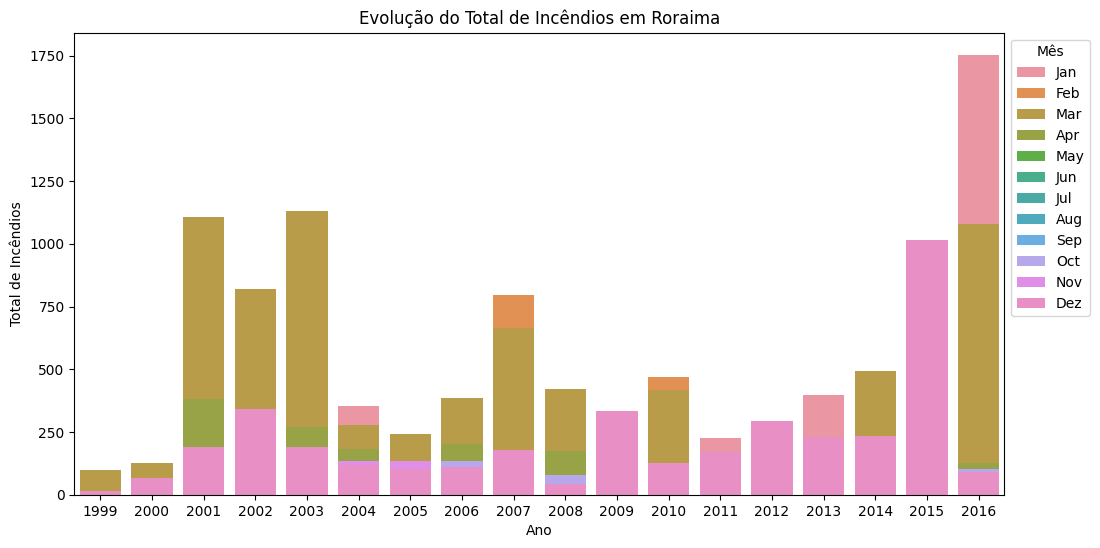

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


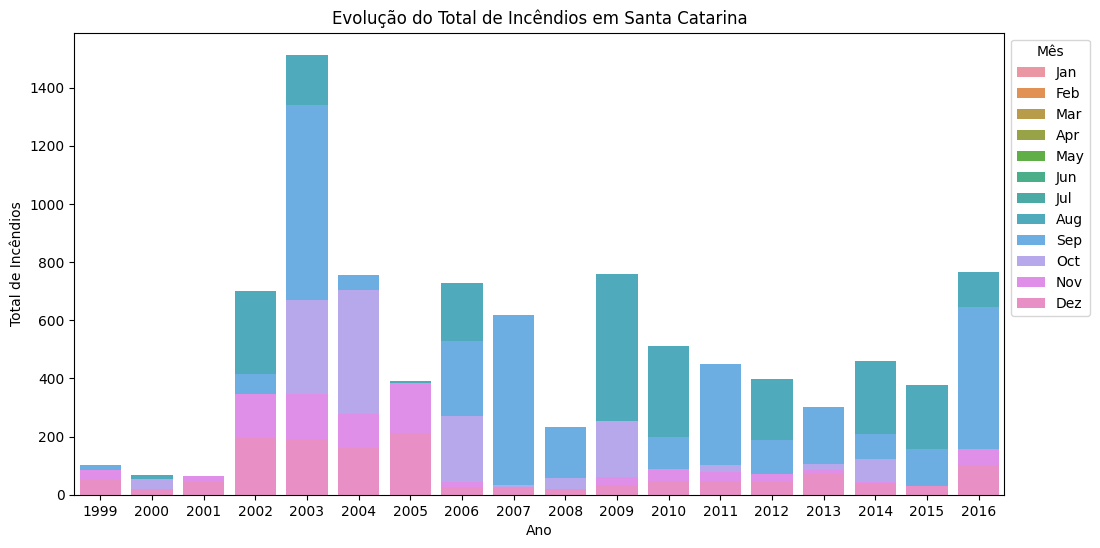

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


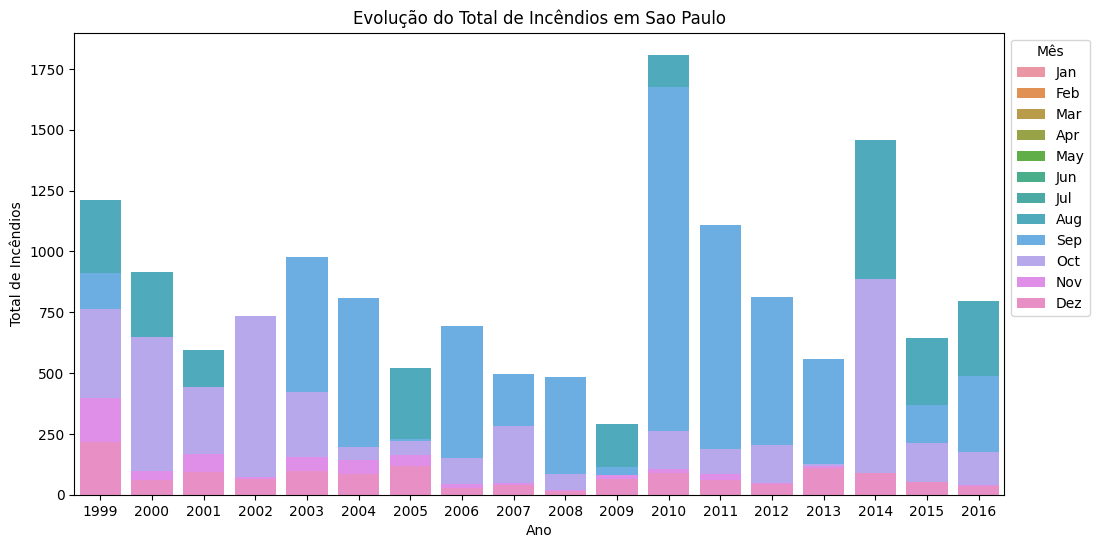

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


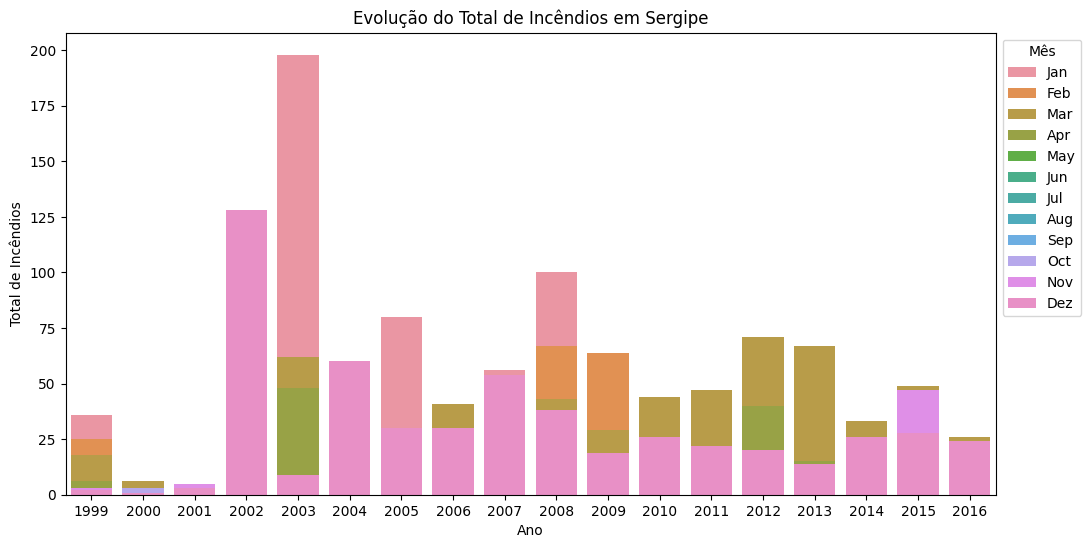

<ipython-input-45-175e8c49661b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month_number'] = state_data['month'].map(month_dict)
<ipython-input-45-175e8c49661b>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)


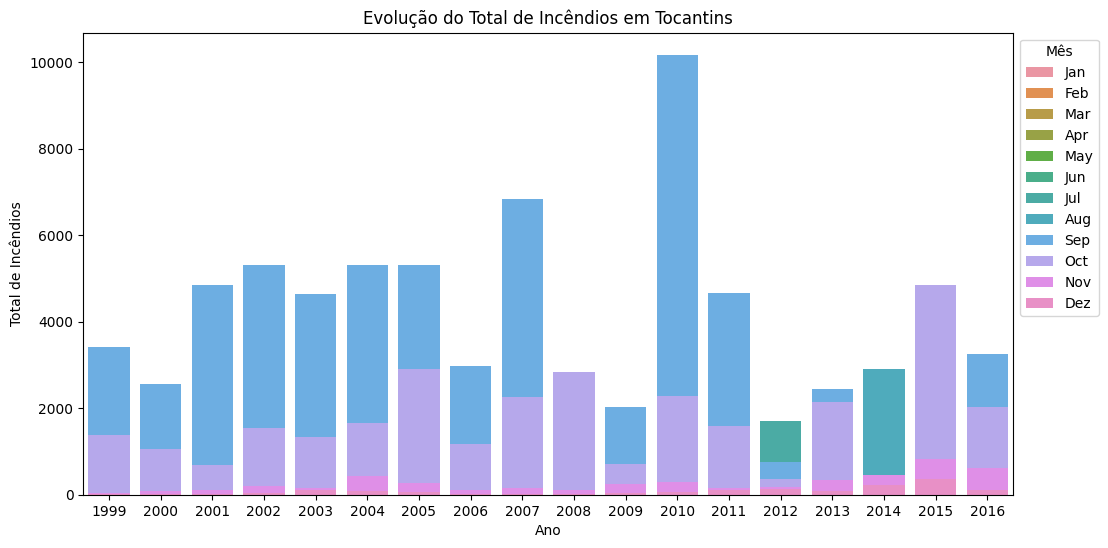

In [45]:
# By state
# Configure a paleta de cores (opcional)
sns.set_palette("husl")

# Filtrar os dados para os anos que deseja analisar (por exemplo, 1999 a 2016)
years_range = range(1999, 2017)
filtered_data = fire[fire['year'].isin(years_range)]

# Mapeie os nomes dos meses para seus equivalentes numéricos
month_dict = {calendar.month_abbr[i]: i for i in range(1, 13)}

# Crie um novo gráfico de barras empilhadas para cada estado
unique_states = filtered_data['state'].unique()

for state in unique_states:
    state_data = filtered_data[filtered_data['state'] == state]

    # Crie uma nova coluna 'month_number' para ordenar os meses
    state_data['month_number'] = state_data['month'].map(month_dict)

    # Ordene os dados pelo ano e pelo mês
    state_data = state_data.sort_values(by=['year', 'month_number'])

    # Crie um gráfico de barras empilhadas
    plt.figure(figsize=(12, 6))
    sns.barplot(data=state_data, x='year', y='number', hue='month', ci=None, dodge=False)
    plt.title(f'Evolução do Total de Incêndios em {state}')
    plt.xlabel('Ano')
    plt.ylabel('Total de Incêndios')
    plt.legend(title='Mês', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()


It was also analyzed a "heatmap" of Brazil, showing by colors the states that have more fires.
For future perspectives, it would also be intersting to do a correlation between the number of fires and temperature/rain; and the urban area vs forest.

In [59]:
import geopandas as gpd
#Link:https://forest-gis.com/download-gis-base-de-dados/#google_vignette
# Carregue o arquivo shapefile dos estados do Brasil
brasil = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Datasets_Brasil/BR_UF_2020.shp')

print(brasil)


   CD_UF                NM_UF SIGLA_UF     NM_REGIAO  \
0     11             Rondônia       RO         Norte   
1     12                 Acre       AC         Norte   
2     13             Amazonas       AM         Norte   
3     14              Roraima       RR         Norte   
4     15                 Pará       PA         Norte   
5     16                Amapá       AP         Norte   
6     17            Tocantins       TO         Norte   
7     21             Maranhão       MA      Nordeste   
8     22                Piauí       PI      Nordeste   
9     23                Ceará       CE      Nordeste   
10    24  Rio Grande do Norte       RN      Nordeste   
11    25              Paraíba       PB      Nordeste   
12    26           Pernambuco       PE      Nordeste   
13    27              Alagoas       AL      Nordeste   
14    28              Sergipe       SE      Nordeste   
15    29                Bahia       BA      Nordeste   
16    31         Minas Gerais       MG       Sud

In [60]:
pip install unidecode

<ipython-input-75-dd21e0871d57>:56: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, sigla, valor in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['sigla'], merged_data['number']):


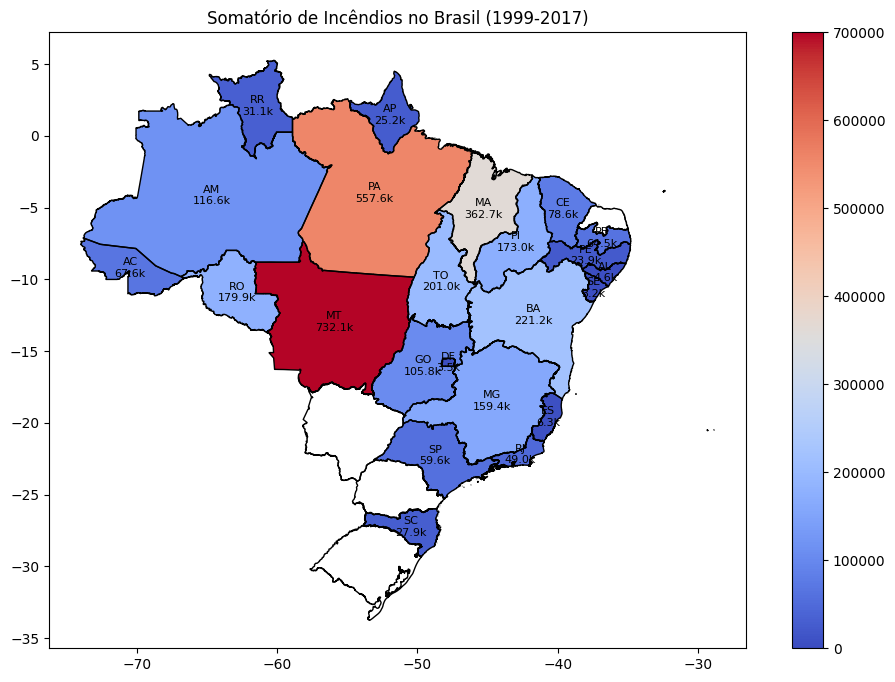

In [75]:
import geopandas as gpd
from unidecode import unidecode

# Renomeie a coluna "state" no conjunto de dados de incêndios para "nome" para corresponder ao shapefile
fire.rename(columns={'state': 'NM_UF'}, inplace=True)

# Remova a acentuação dos nomes dos estados no shapefile
brasil['nome_sem_acentos'] = brasil['NM_UF'].map(unidecode)

# Tabela de mapeamento de estados para siglas
mapeamento_siglas = {
    'Acre': 'AC',
    'Alagoas': 'AL',
    'Amapa': 'AP',
    'Amazonas': 'AM',
    'Bahia': 'BA',
    'Ceara': 'CE',
    'Distrito Federal': 'DF',
    'Espirito Santo': 'ES',
    'Goias': 'GO',
    'Maranhao': 'MA',
    'Mato Grosso': 'MT',
    'Minas Gerais': 'MG',
    'Para': 'PA',
    'Paraiba': 'PB',
    'Pernambuco': 'PE',
    'Piau': 'PI',
    'Rio': 'RJ',
    'Rondonia': 'RO',
    'Roraima': 'RR',
    'Santa Catarina': 'SC',
    'Sao Paulo': 'SP',
    'Sergipe': 'SE',
    'Tocantins': 'TO'
}

agg_data = fire.groupby(['sigla'])['number'].sum().reset_index()

# Crie uma nova camada de contornos apenas com os estados presentes no conjunto de dados
contornos_estados = brasil[brasil['SIGLA_UF'].isin(agg_data['sigla'])]

# Plote o heatmap com escala ajustada usando o somatório total
merged_data = contornos_estados.merge(agg_data, left_on='SIGLA_UF', right_on='sigla', how='left')

# Plote o mapa do Brasil com um heatmap e os contornos de todos os estados
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_title('Somatório de Incêndios no Brasil (1999-2017)')

# Plote o mapa com os contornos
brasil.boundary.plot(ax=ax, linewidth=1, color='k')

# Plote o heatmap
cax = merged_data.plot(column='number', cmap='coolwarm', legend=True, ax=ax, vmin=0, vmax=700000)

# Adicione rótulos aos estados com as siglas e os valores de incêndios correspondentes
for x, y, sigla, valor in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['sigla'], merged_data['number']):
    label_in_milhares = valor / 1000  # Divida por 1000 para exibir em milhares
    ax.annotate(text=f'{sigla}\n{label_in_milhares:.1f}k', xy=(x, y), fontsize=8, ha='center', va='center')

plt.show()

